In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

45


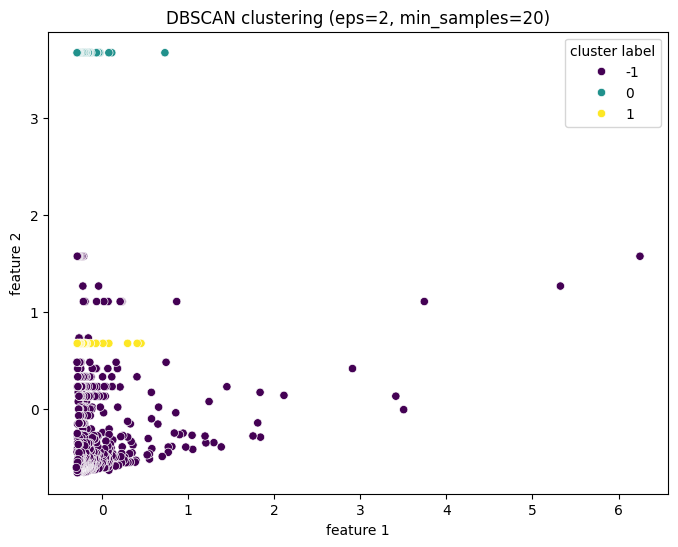

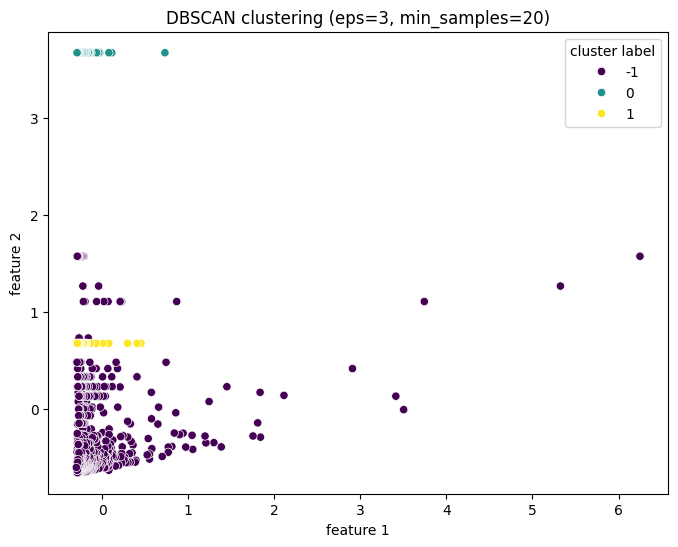

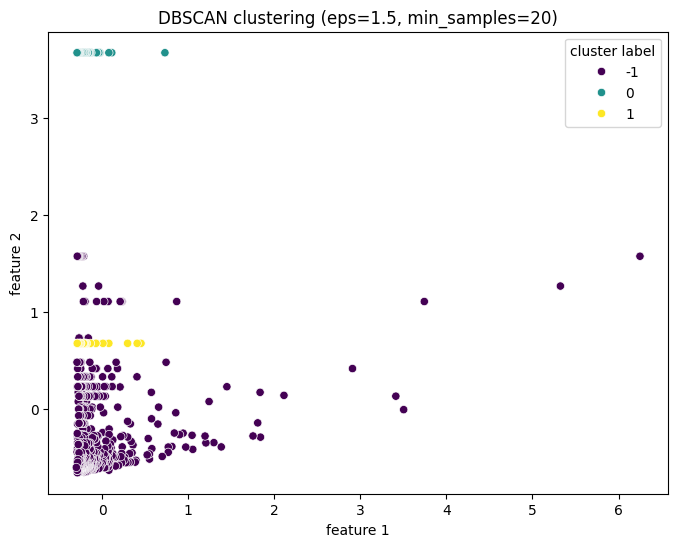

   city_population  county_population  density    pct_men  pct_women  \
0          8336817            1653877    10715  47.291425  52.708575   
1          3979576           10105722     3276  49.275460  50.724540   
2           462628           10105722     3523  49.275460  50.724540   
3           212979           10105722     1162  49.275460  50.724540   
4           199303           10105722     2525  49.275460  50.724540   

   pct_hispanic  pct_white  pct_black  pct_native  pct_asian  ...  \
0          26.1       46.8       12.5         0.1       11.9  ...   
1          48.4       26.5        7.9         0.2       14.3  ...   
2          48.4       26.5        7.9         0.2       14.3  ...   
3          48.4       26.5        7.9         0.2       14.3  ...   
4          48.4       26.5        7.9         0.2       14.3  ...   

   LTM_min_temp  LTM_max_temp  age29andunder_pct  age65andolder_pct  \
0          48.6          64.1          36.439695          14.383705   
1         

In [5]:
'''
use all the variables to do a DBSCAN method
however, this is probably not the right way to do it as you get bad clusters...
'''
# LOAD DATA
data = pd.read_csv("data/numerical_data.csv")

# replace null/missing values in each column with column averages
data.fillna(data.mean(), inplace=True)

# drop 'index' column
data.drop(columns=['index'], inplace=True, errors='ignore')
print(data.shape[1])

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# remove outliers using LOF?
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_mask = lof.fit_predict(X_scaled)
X_no_outliers = X_scaled[outlier_mask == 1]

# def different vals of eps & min_samples
eps_values = [2, 3, 1.5]
min_samples = 20

for eps in eps_values:
    # create and fit DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X_no_outliers)
    
    # visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_no_outliers[:, 0], y=X_no_outliers[:, 1], hue=dbscan.labels_, palette='viridis', legend='full')
    plt.title(f'DBSCAN clustering (eps={eps}, min_samples={min_samples})')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(title='cluster label', loc='upper right')
    plt.show()

print(data.head())


     city_population  county_population  density    pct_men  pct_women  \
0            8336817            1653877    10715  47.291425  52.708575   
1            3979576           10105722     3276  49.275460  50.724540   
2             462628           10105722     3523  49.275460  50.724540   
3             212979           10105722     1162  49.275460  50.724540   
4             199303           10105722     2525  49.275460  50.724540   
..               ...                ...      ...        ...        ...   
696            51093             134327      463  48.874761  51.125239   
697            50952             999539     1567  47.432867  52.567133   
698            50925             118522      515  48.677883  51.322117   
699            49688              62421      259  49.545826  50.454174   
700            46536             187827      570  48.137382  51.862618   

     pct_hispanic  pct_white  pct_black  pct_native  pct_asian  ...  \
0            26.1       46.8       12.5 

ValueError: Could not interpret value `city_population` for `x`. An entry with this name does not appear in `data`.

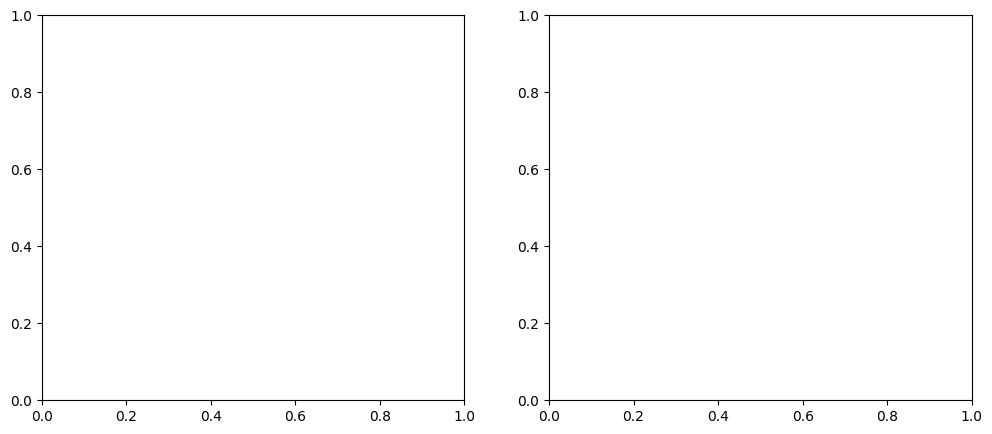

In [6]:
'''
use 3 distinct features, without standardizing or normalizing, to create DBSCAN clusters
'''
data = pd.read_csv("data/numerical_data.csv")

# replace null/missing values in each column with column average
data.fillna(data.mean(), inplace=True)

# drop 'index' column if it exists
data.drop(columns=['index'], inplace=True, errors='ignore')
print(data)

X_train = data[['city_population', 'avg_income', 'mean_commute']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_train = pd.DataFrame(X_scaled)

# create separate dbscan dataset
clustering = DBSCAN(eps=30, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'cluster'] = clustering.labels_ 

print(DBSCAN_dataset)
DBSCAN_dataset.cluster.value_counts().to_frame()

# get outliers
outliers = DBSCAN_dataset[DBSCAN_dataset['cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

# what is wrong with line below?
sns.scatterplot(x='city_population', y='mean_commute',
                data=DBSCAN_dataset[DBSCAN_dataset['cluster']!=-1],
                hue='cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='avg_income', y='mean_commute',
                data=DBSCAN_dataset[DBSCAN_dataset['cluster']!=-1],
                hue='cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['city_population'], outliers['mean_commute'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['avg_income'], outliers['mean_commute'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()    

In [ ]:
# OUTLIER DETECTION TEST (REQUIRED?)

# outlier detection using LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_mask = lof.fit_predict(X_scaled)
X_no_outliers = X_scaled[outlier_mask == 1]

# params for DBSCAN
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 12]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, algorithm='ball_tree', metric='minkowski')
        dbscan.fit(X_no_outliers)

        # visualize clusters!
        plt.figure(figsize=(8, 6))
        plt.scatter(X_no_outliers[:, 0], X_no_outliers[:, 1], c=dbscan.labels_, cmap='viridis')
        plt.title(f'DBSCAN clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.colorbar(label='cluster label')
        plt.show()

TypeError: '<' not supported between instances of 'NoneType' and 'int'

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/1684628789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


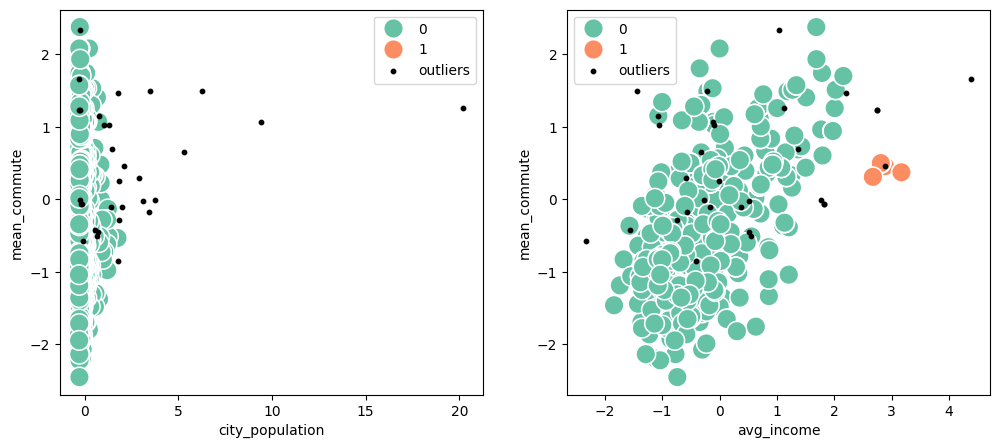

In [ ]:
# DBSCAN: CLUSTERING WITH 3 FEATURES (CITY POP, AVG INCOME, MEAN COMMUTE)
# no metric

# load data
data = pd.read_csv("data/numerical_data.csv")

# drop 'index' col
data.drop(columns=['index'], inplace=True, errors='ignore')

# select features
X_train = data[['city_population', 'avg_income', 'mean_commute']]

# replace missing values with avg of each column
X_train.fillna(X_train.mean(), inplace=True)

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=X_train.columns)

# create DBSCAN clusters
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset['cluster'] = clustering.labels_

# plot!
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot 1
sns.scatterplot(x='city_population', y='mean_commute',
                data=DBSCAN_dataset[DBSCAN_dataset['cluster'] != -1],
                hue='cluster', ax=axes[0], palette='Set2', legend='full', s=200)
axes[0].scatter(DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'city_population'], 
                DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'mean_commute'], 
                s=10, label='outliers', c="k")
axes[0].legend()

# plot 2
sns.scatterplot(x='avg_income', y='mean_commute',
                data=DBSCAN_dataset[DBSCAN_dataset['cluster'] != -1],
                hue='cluster', palette='Set2', ax=axes[1], legend='full', s=200)
axes[1].scatter(DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'avg_income'], 
                DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'mean_commute'], 
                s=10, label='outliers', c="k")
axes[1].legend()

plt.show()

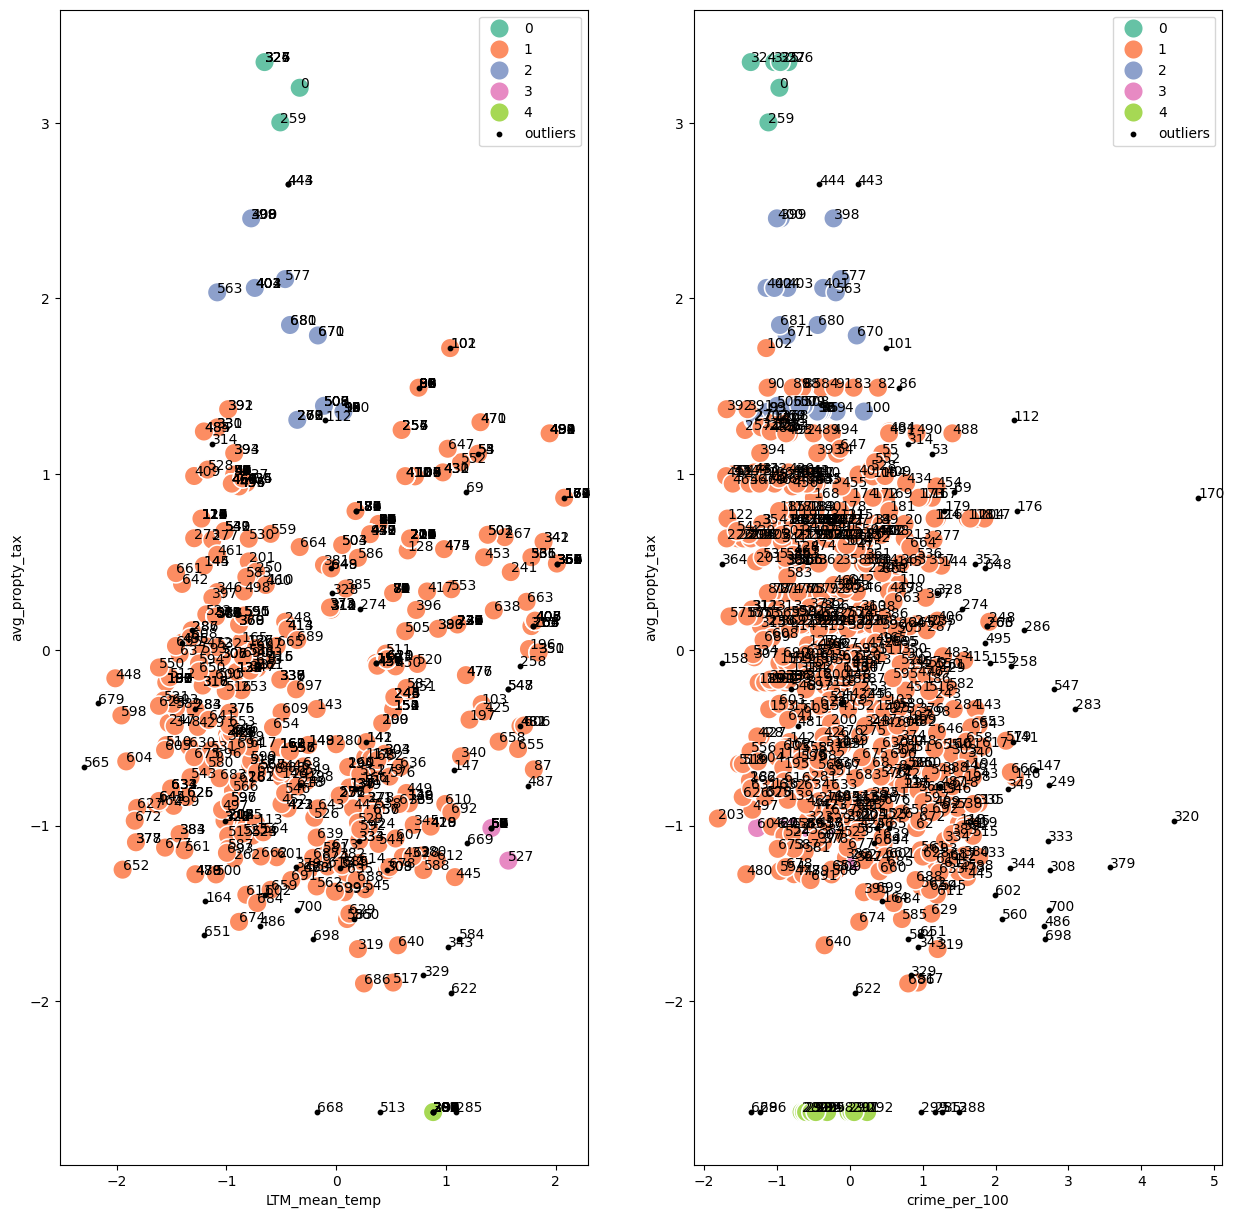

In [ ]:
# DBSCAN: MEAN TEMPERATURE, AVERAGE PROPERTY TAX, CRIME RATE
# no metric

# laod data
data = pd.read_csv("data/numerical_data.csv")

# drop 'index' column
data.drop(columns=['index'], inplace=True, errors='ignore')

# select features
features = ['LTM_mean_temp', 'avg_propty_tax', 'crime_per_100']

# replace missing values with means
data.fillna(data.mean(), inplace=True)

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])
X_train = pd.DataFrame(X_scaled, columns=features)

# create DBSCAN clusters
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset['cluster'] = clustering.labels_

# plot each
fig2, axes = plt.subplots(1, 2, figsize=(15, 15))

# plot 1
sns.scatterplot(x='LTM_mean_temp', y='avg_propty_tax',
                data=DBSCAN_dataset[DBSCAN_dataset['cluster'] != -1],
                hue='cluster', ax=axes[0], palette='Set2', legend='full', s=200)
axes[0].scatter(DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'LTM_mean_temp'],
                DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'avg_propty_tax'],
                s=10, label='outliers', c="k")
axes[0].legend()

# plot 2
sns.scatterplot(x='crime_per_100', y='avg_propty_tax',
                data=DBSCAN_dataset[DBSCAN_dataset['cluster'] != -1],
                hue='cluster', palette='Set2', ax=axes[1], legend='full', s=200)
axes[1].scatter(DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'crime_per_100'],
                DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, 'avg_propty_tax'],
                s=10, label='outliers', c="k")
axes[1].legend()

# label data points...
for i, txt in enumerate(DBSCAN_dataset.index):
    axes[0].annotate(txt, (DBSCAN_dataset['LTM_mean_temp'][i], DBSCAN_dataset['avg_propty_tax'][i]))
    axes[1].annotate(txt, (DBSCAN_dataset['crime_per_100'][i], DBSCAN_dataset['avg_propty_tax'][i]))

plt.show()


/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


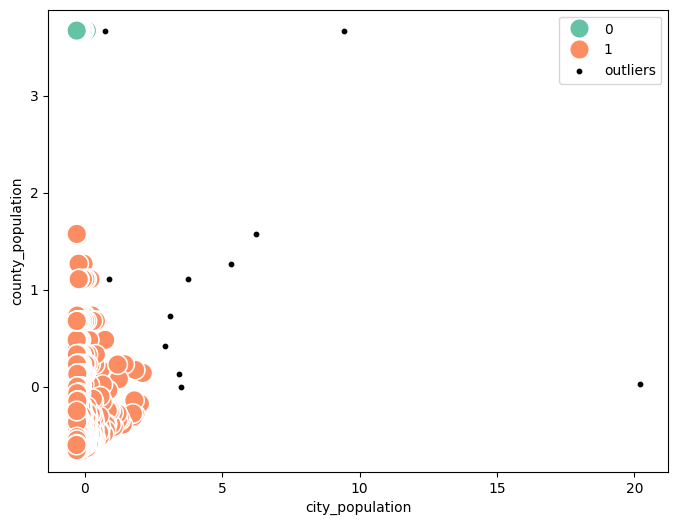

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


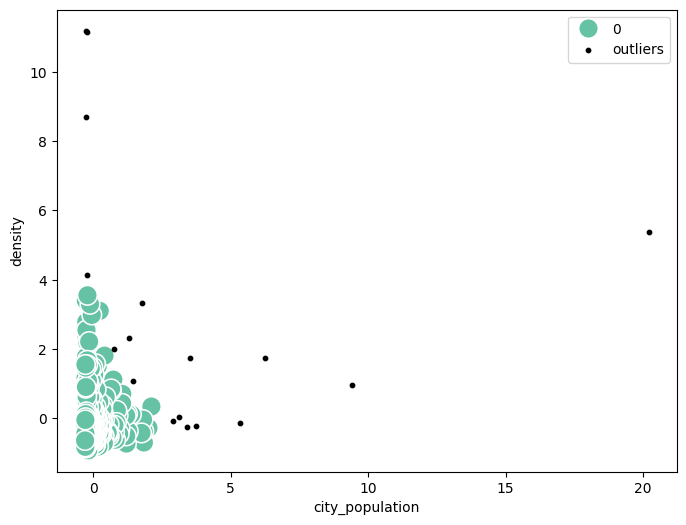

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


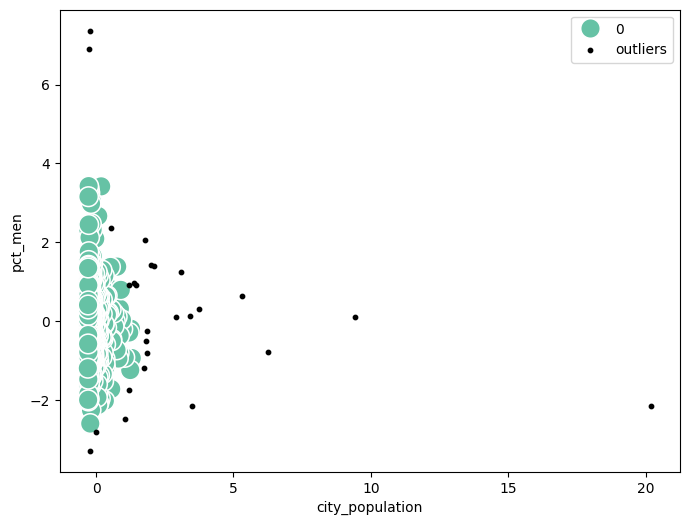

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


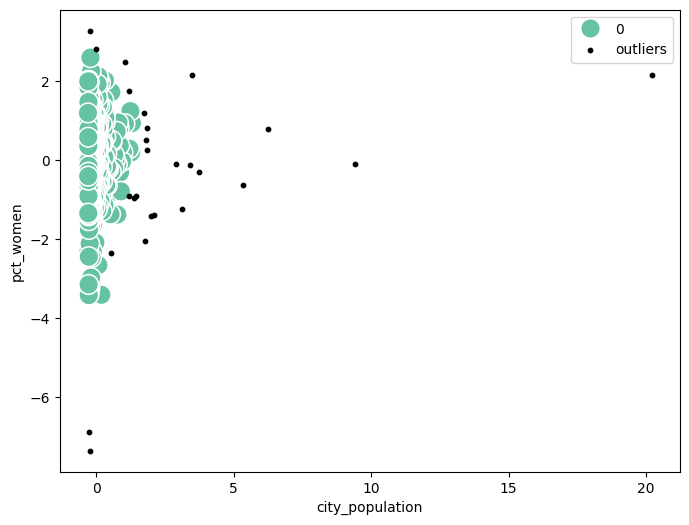

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


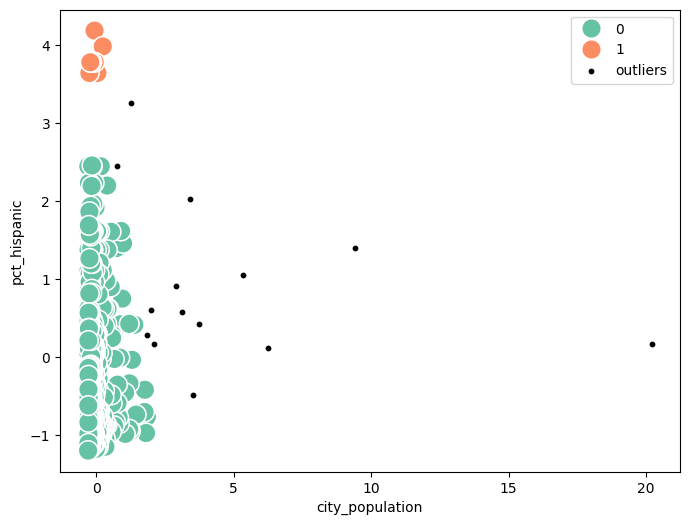

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


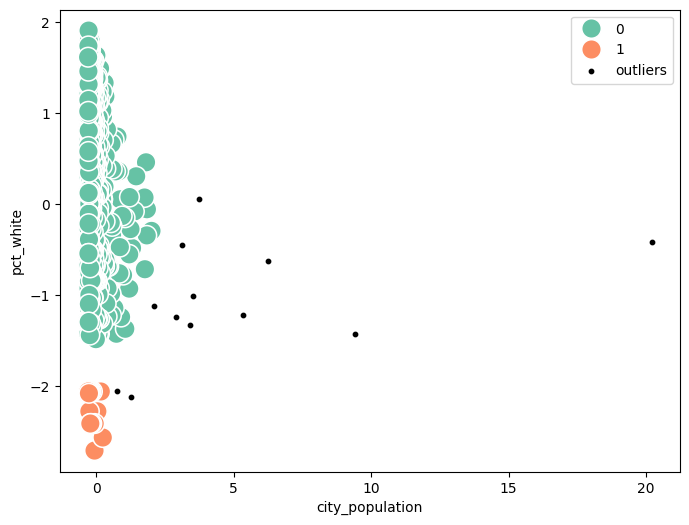

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


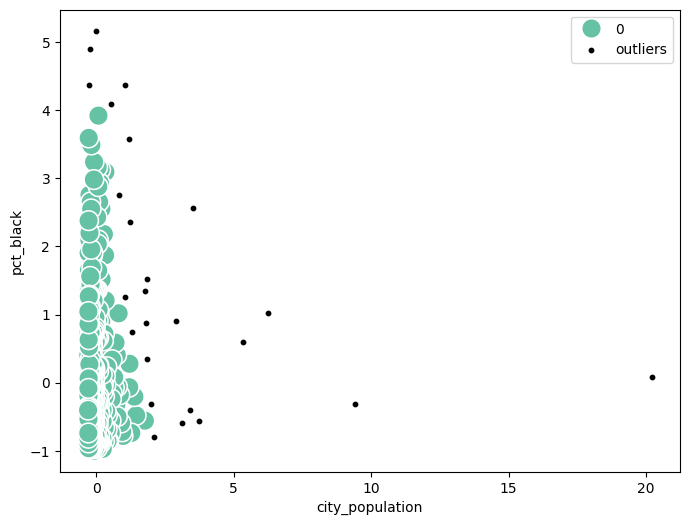

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


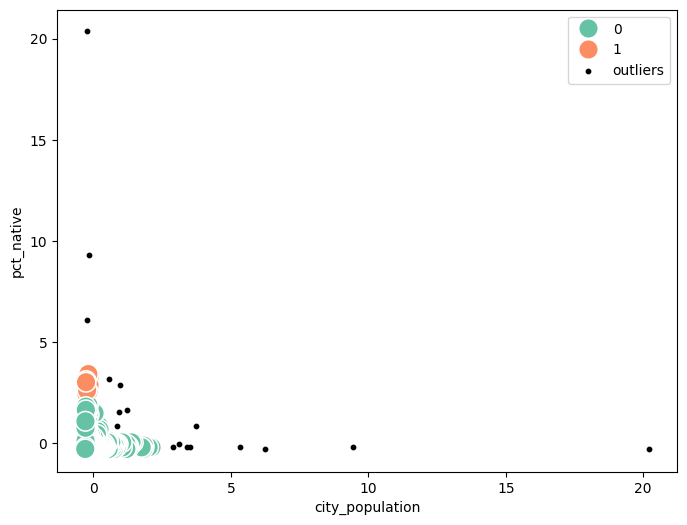

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


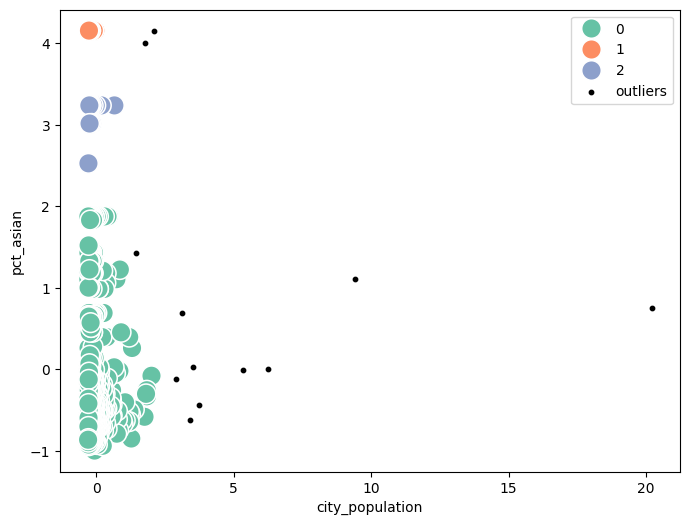

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


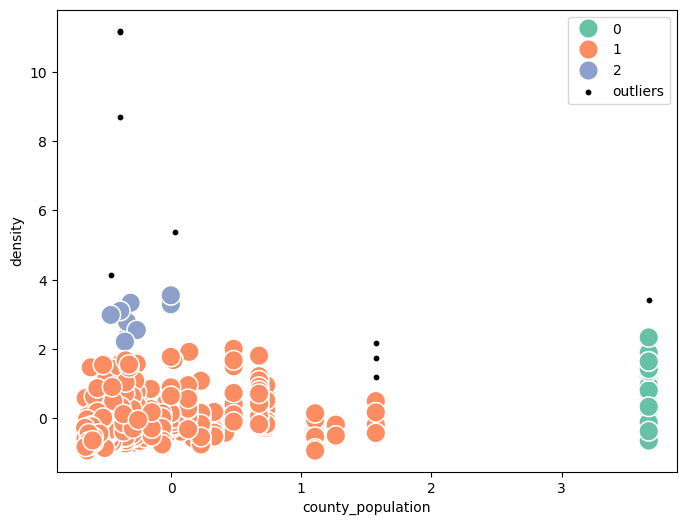

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


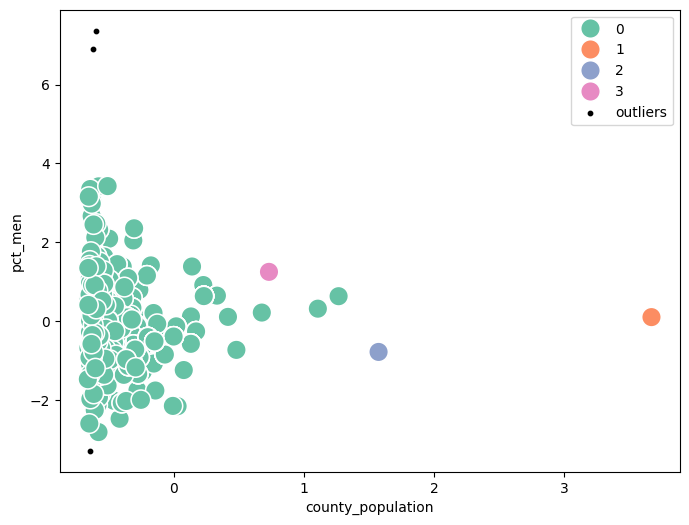

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


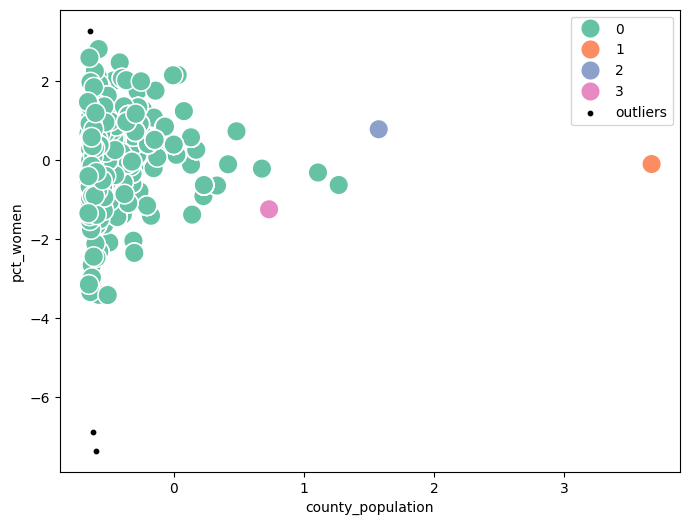

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


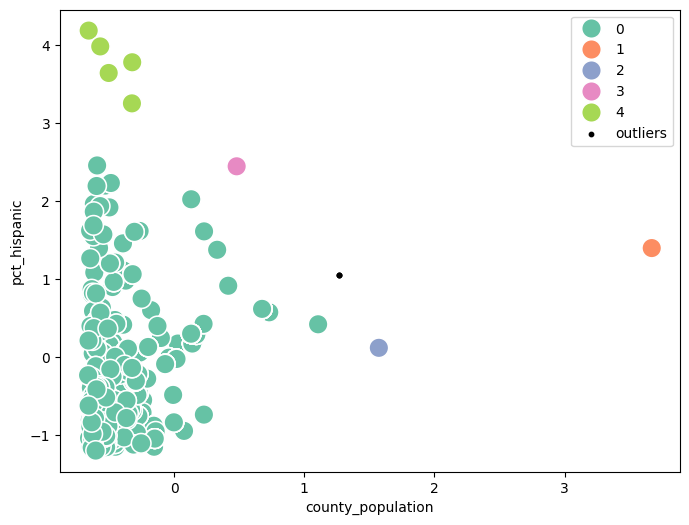

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


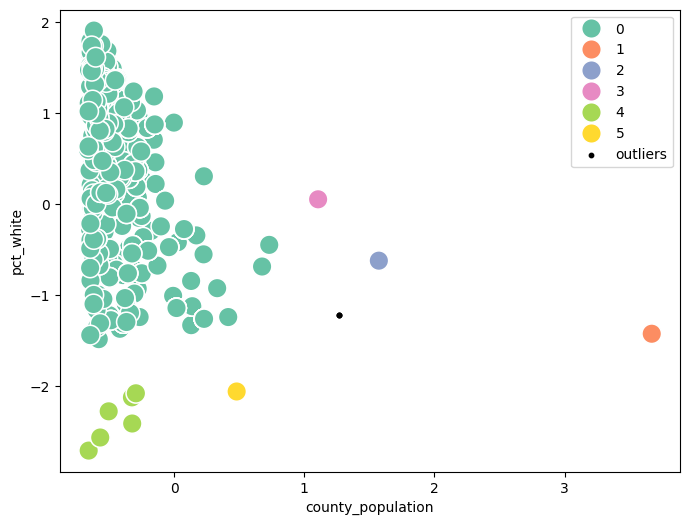

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


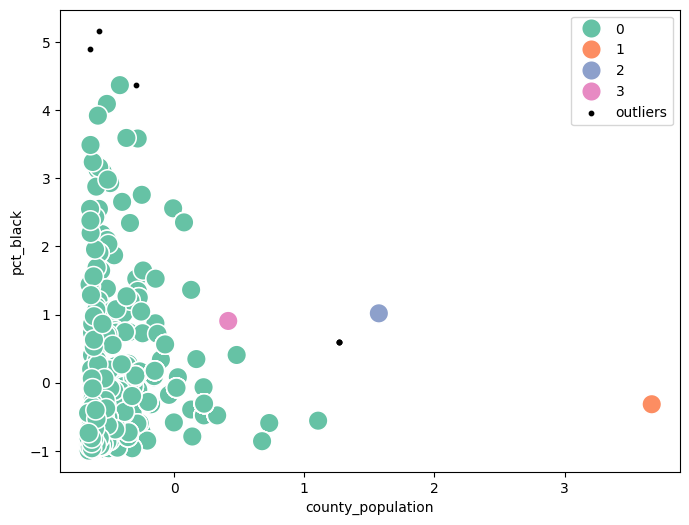

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


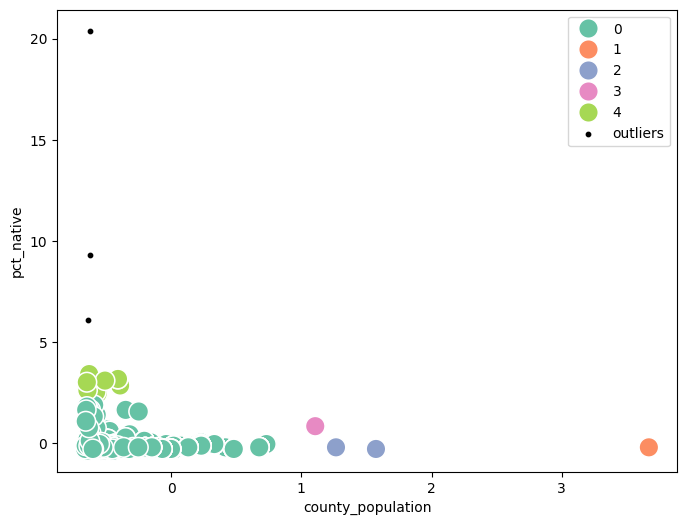

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


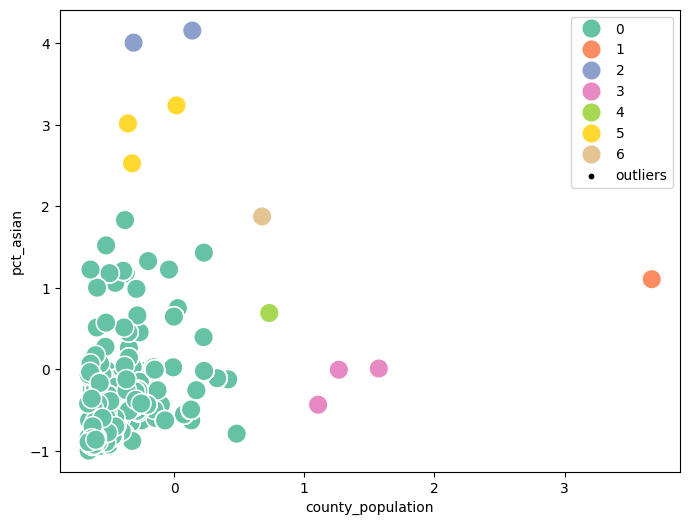

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


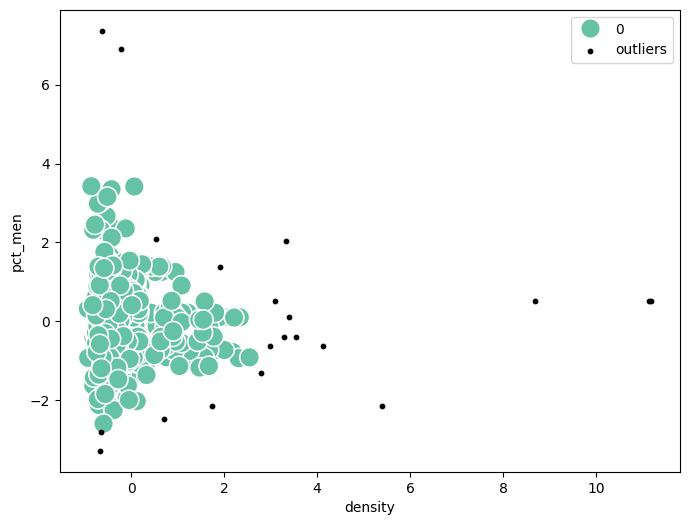

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


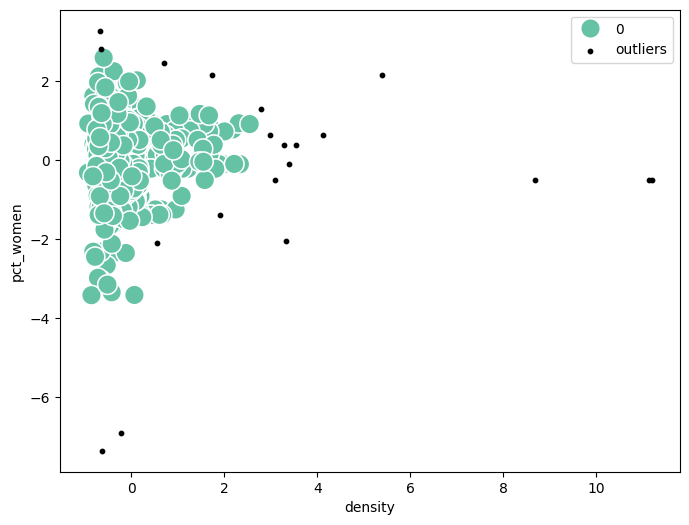

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


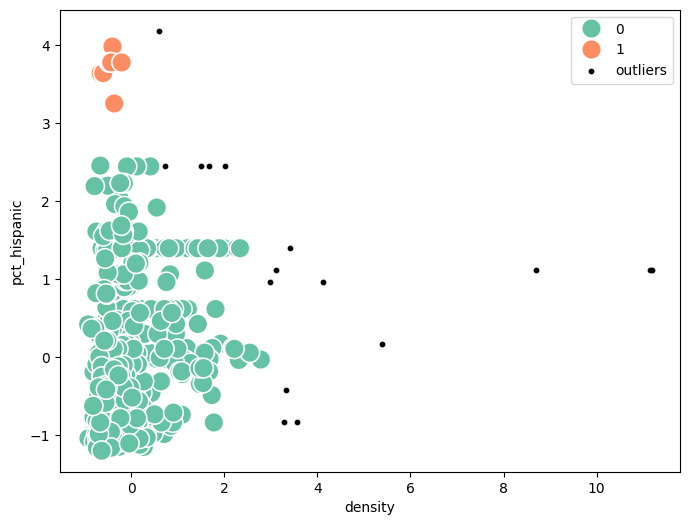

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


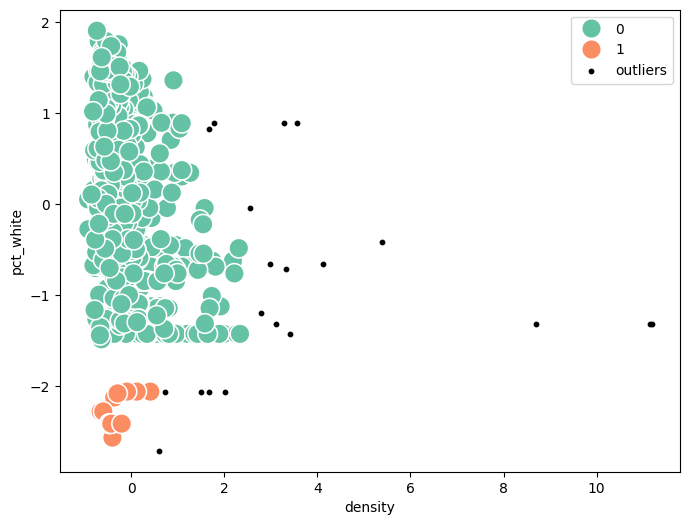

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


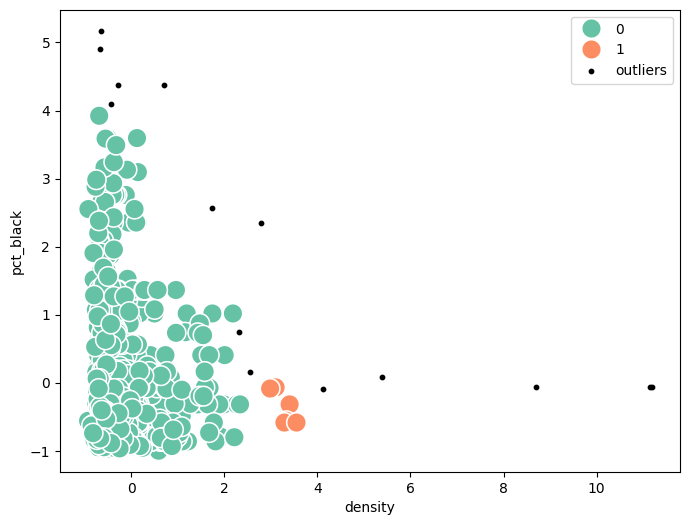

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


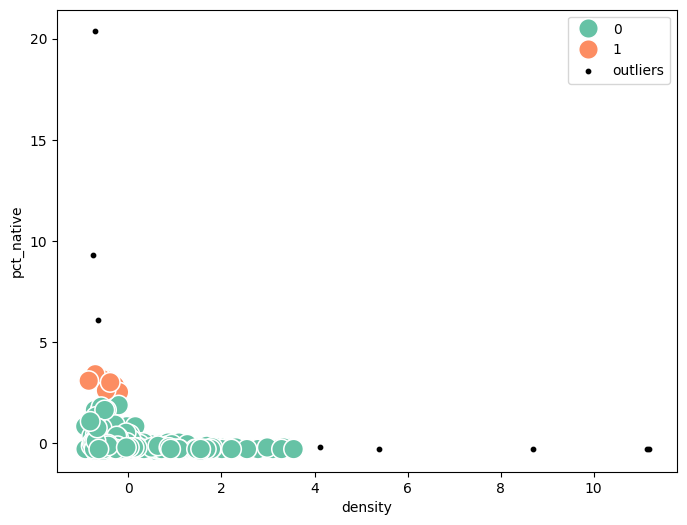

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


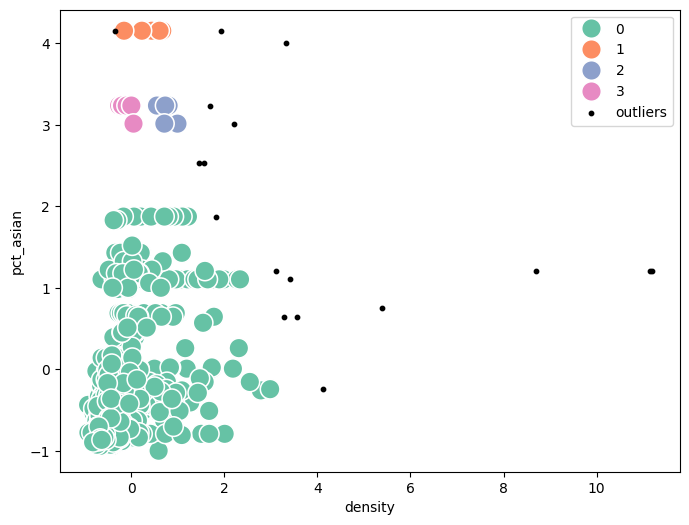

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


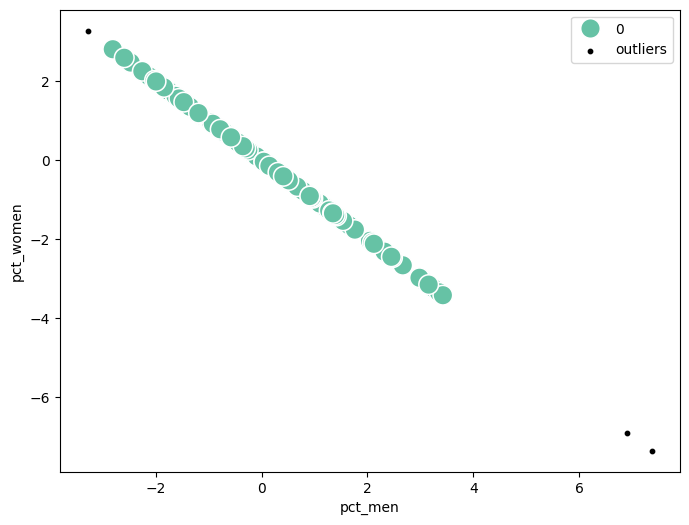

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


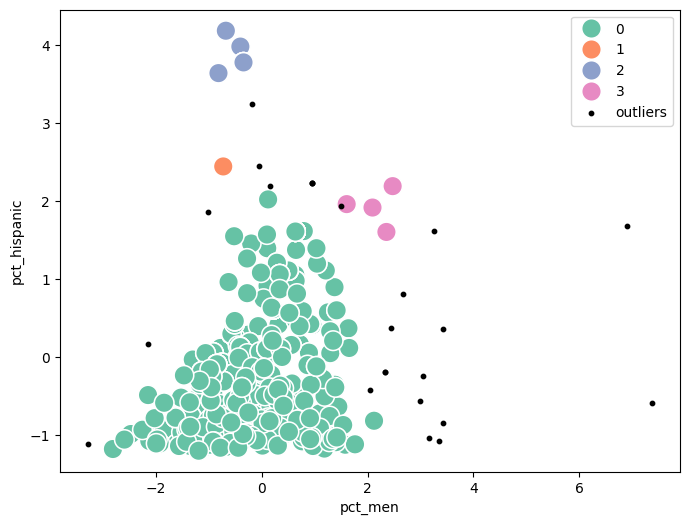

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


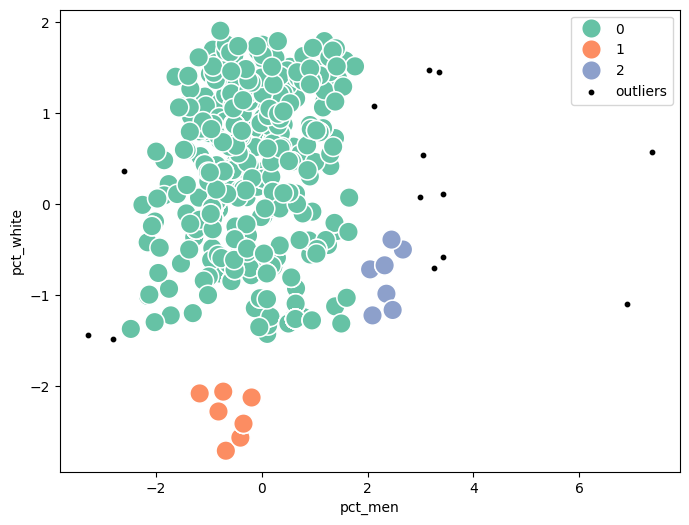

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


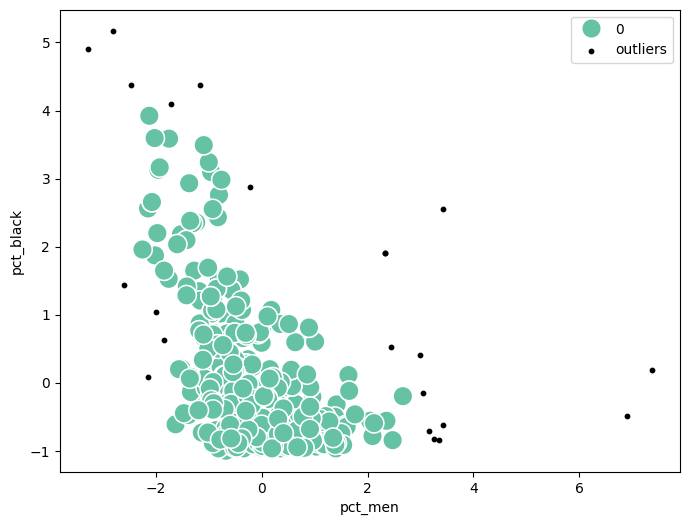

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


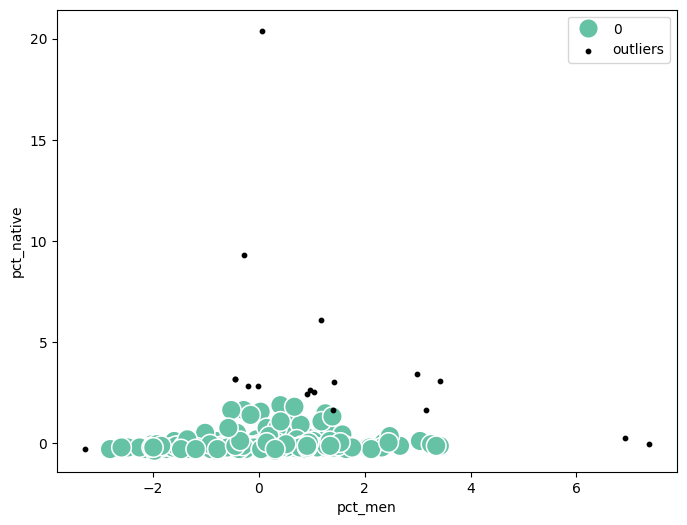

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


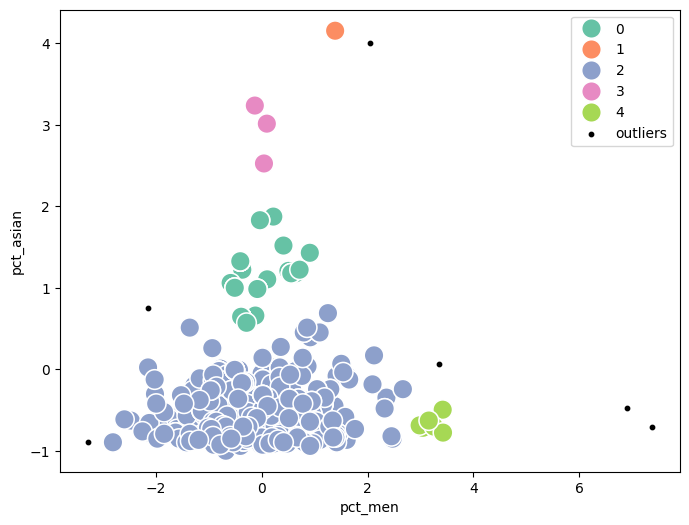

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


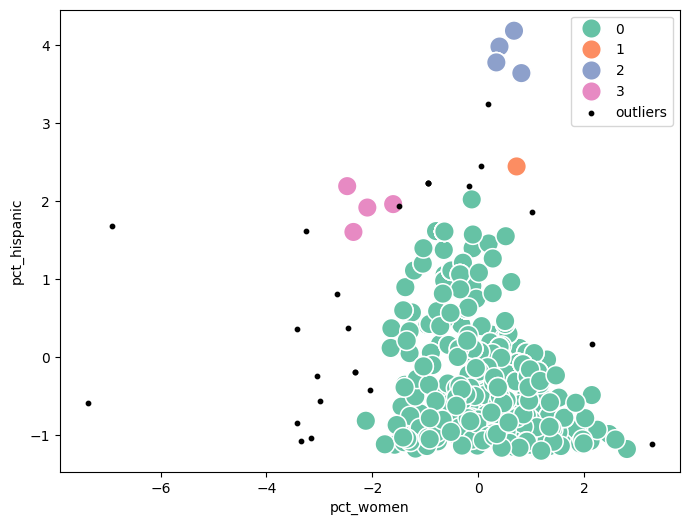

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


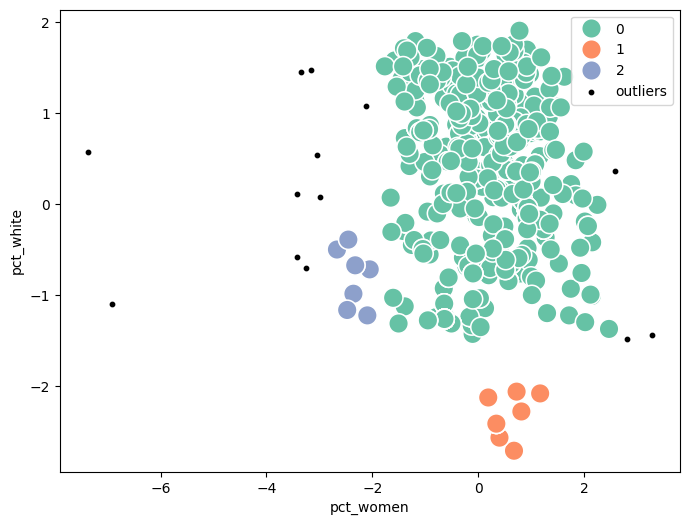

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


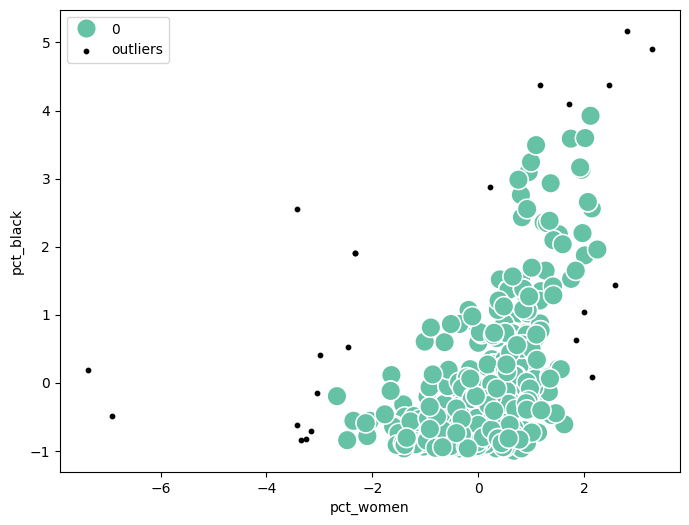

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


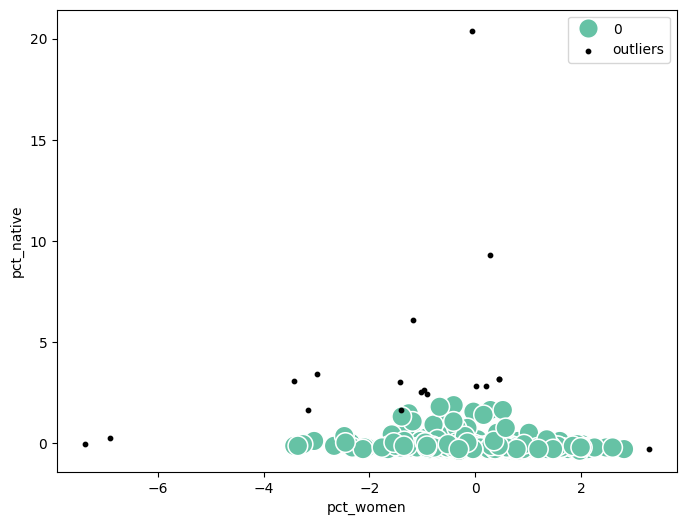

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


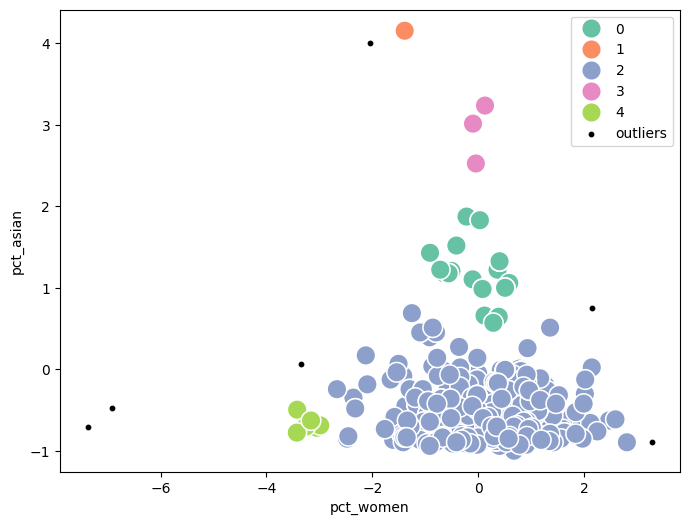

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


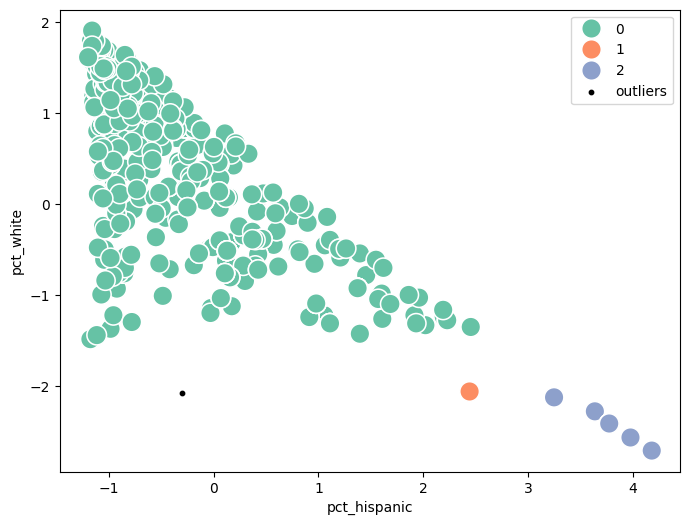

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


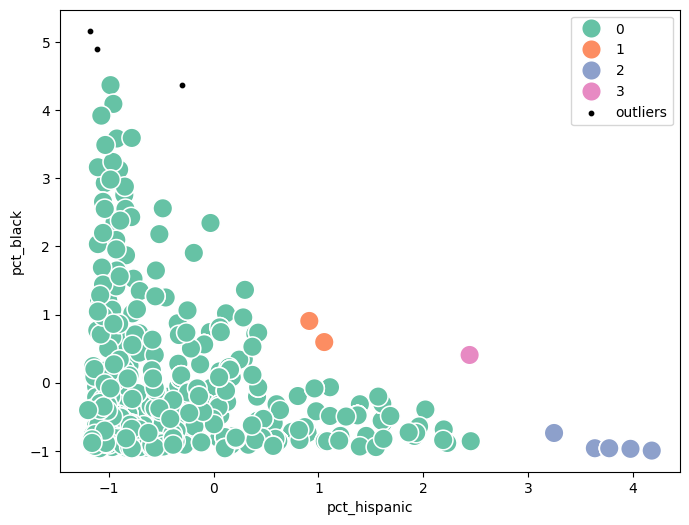

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


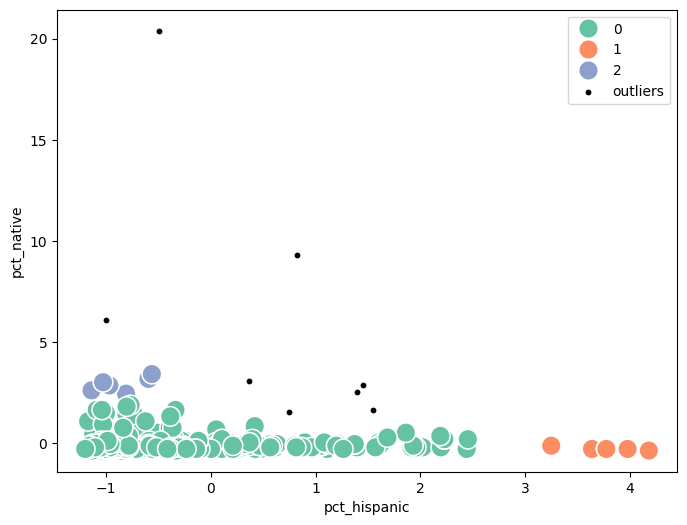

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


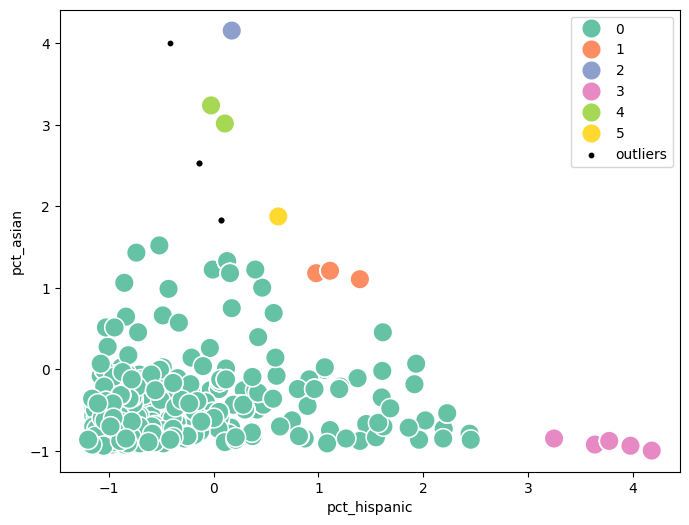

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


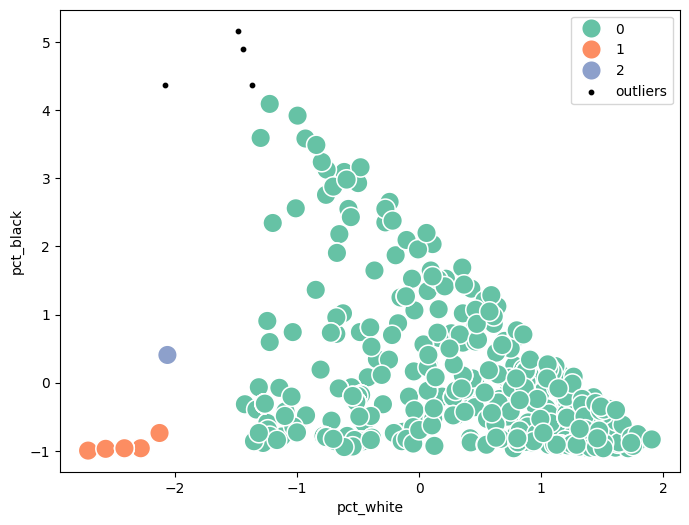

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


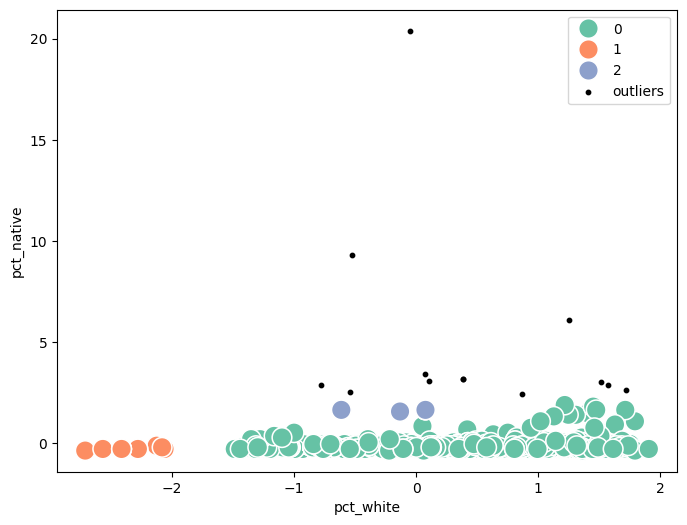

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


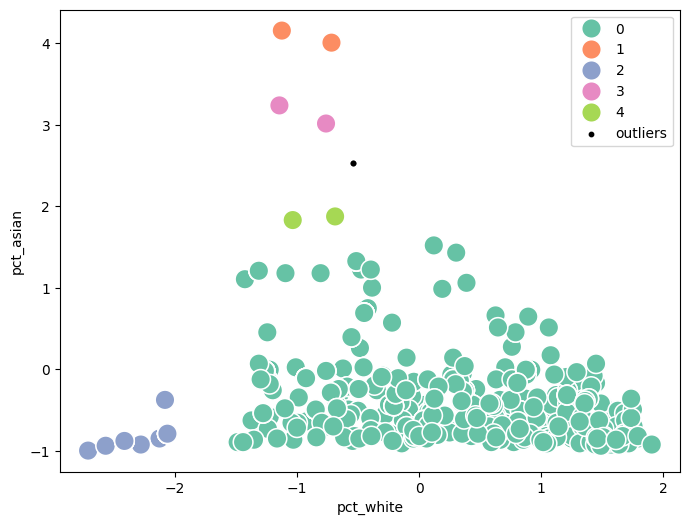

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


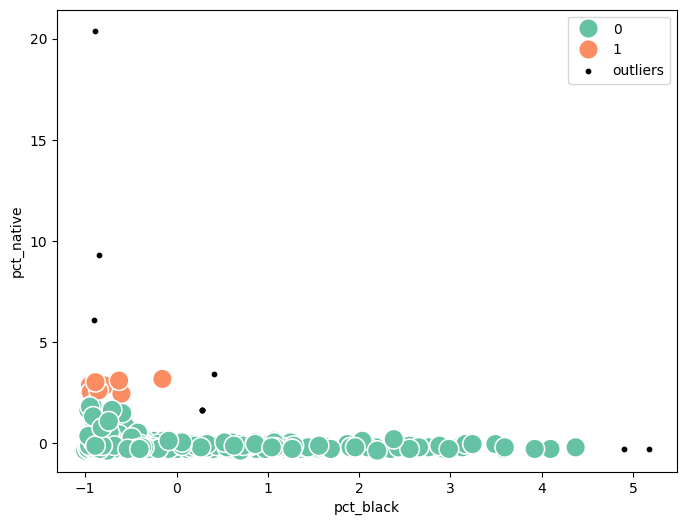

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


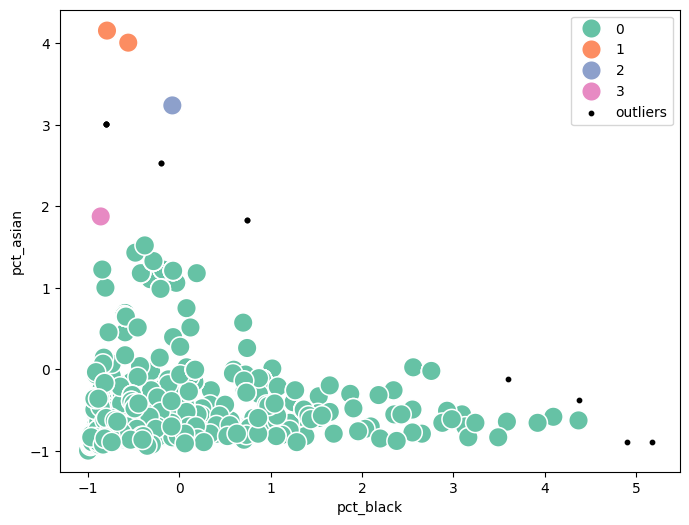

/var/folders/jn/ggpyvhb57cl2wckyvdwkqvqh0000gn/T/ipykernel_28394/2814457373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


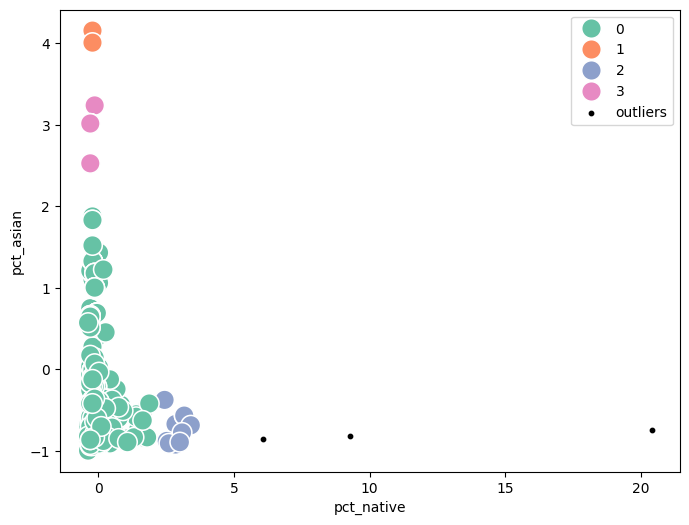

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 701 and the vector passed to `hue` has length 631.

<Figure size 800x600 with 0 Axes>

In [7]:

# DBSCAN: SELECTED FEATURE PAIRS (10 FEATURES)
# no metric

# select 10 features from df
selected_features = data.columns[:10]

# generate all possible pairs of selected features
feature_pairs = list(itertools.combinations(selected_features, 2))

# run dbscan for each pair
for pair in feature_pairs:
    X_train = data[list(pair)]
    X_train.fillna(X_train.mean(), inplace=True)
    X_scaled = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_scaled, columns=X_train.columns)
    try:
        clustering = DBSCAN(eps=0.5, min_samples=5).fit(X_train)
        DBSCAN_dataset = X_train.copy()
        DBSCAN_dataset['cluster'] = clustering.labels_
    except:
        continue
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=DBSCAN_dataset[DBSCAN_dataset['cluster'] != -1], hue='cluster', palette='Set2', legend='full', s=200)
    plt.scatter(DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, pair[0],], 
                DBSCAN_dataset.loc[DBSCAN_dataset['cluster'] == -1, pair[1]], 
                s=10, label='outliers', c="k")
    plt.legend()
    plt.show()

# plot each feature pair dbscan
for pair in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=data, hue=dbscan.labels_, palette='viridis', legend='full')
    plt.title(f'DBSCAN clustering for {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(title='cluster label', loc='upper right')
    plt.show()


eps=0.01, min_samples=5: 4 clusters


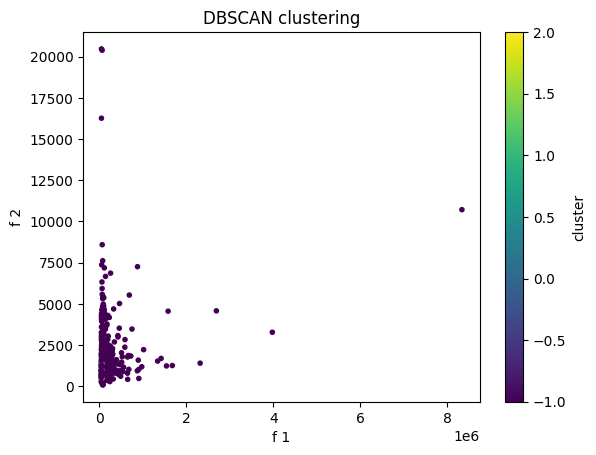

cluster sizes:
-1    679
 0     10
 1      7
 2      5
Name: count, dtype: int64
eps=0.05, min_samples=5: 8 clusters


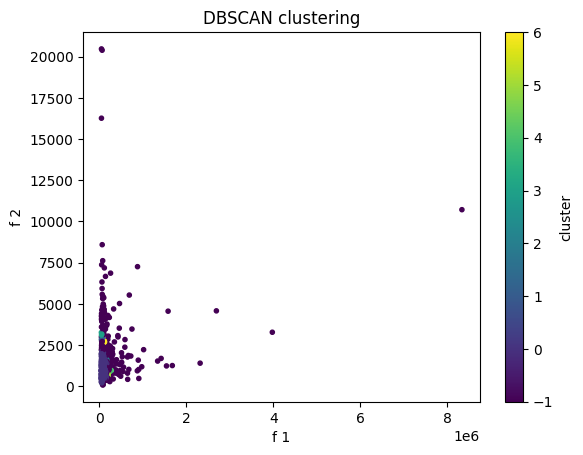

cluster sizes:
 0    442
-1    219
 1      9
 3      8
 5      8
 2      5
 6      5
 4      5
Name: count, dtype: int64
eps=0.05, min_samples=10: 3 clusters


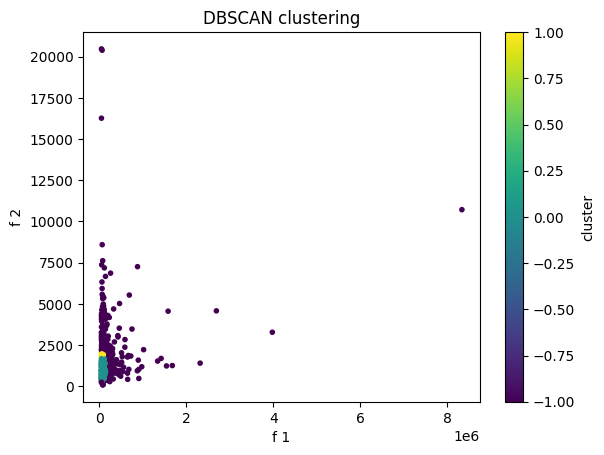

cluster sizes:
 0    379
-1    297
 1     25
Name: count, dtype: int64
eps=0.05, min_samples=15: 4 clusters


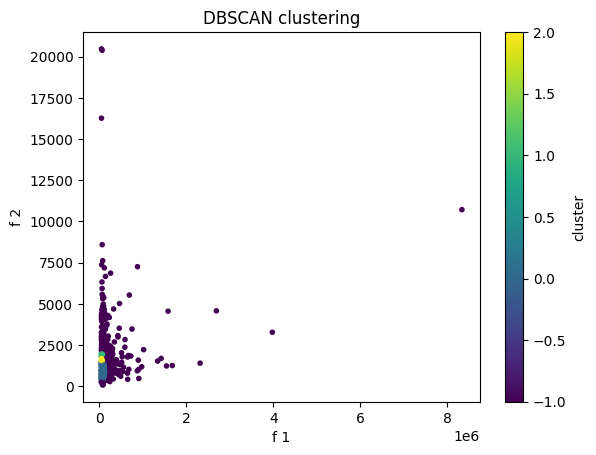

cluster sizes:
-1    360
 0    301
 2     21
 1     19
Name: count, dtype: int64
eps=0.05, min_samples=20: 2 clusters


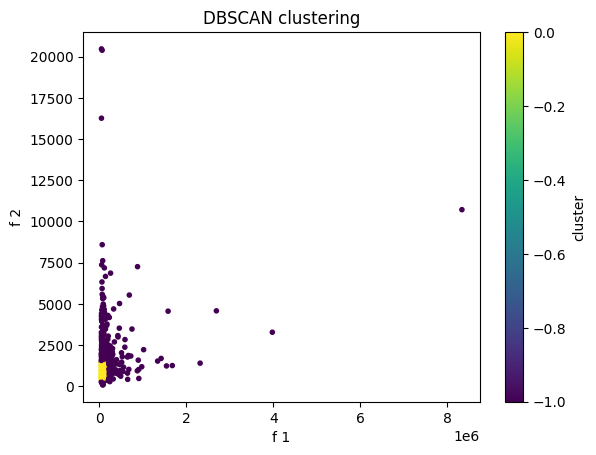

cluster sizes:
-1    434
 0    267
Name: count, dtype: int64
eps=0.05, min_samples=25: 2 clusters


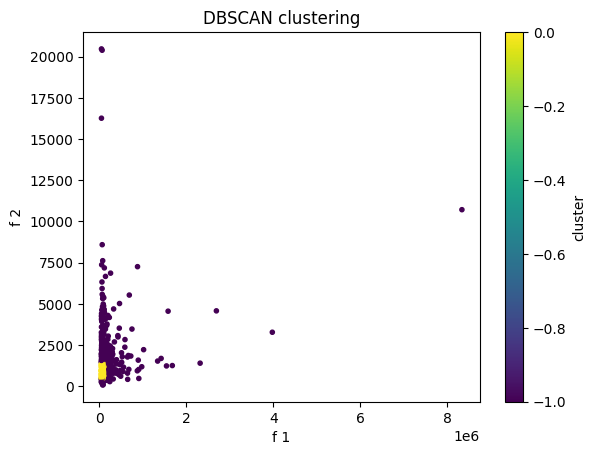

cluster sizes:
-1    461
 0    240
Name: count, dtype: int64
eps=0.1, min_samples=5: 4 clusters


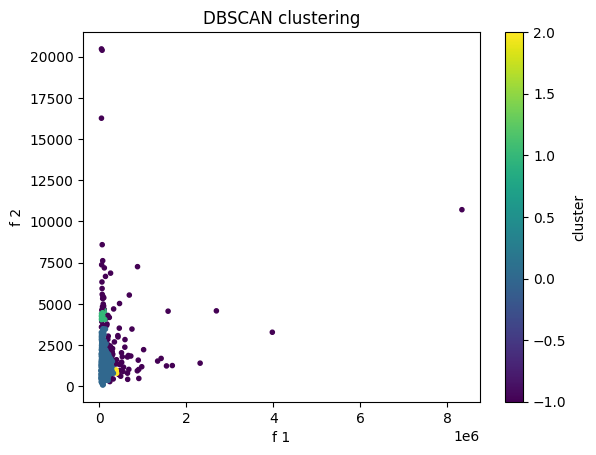

cluster sizes:
 0    593
-1     87
 1     16
 2      5
Name: count, dtype: int64
eps=0.1, min_samples=10: 3 clusters


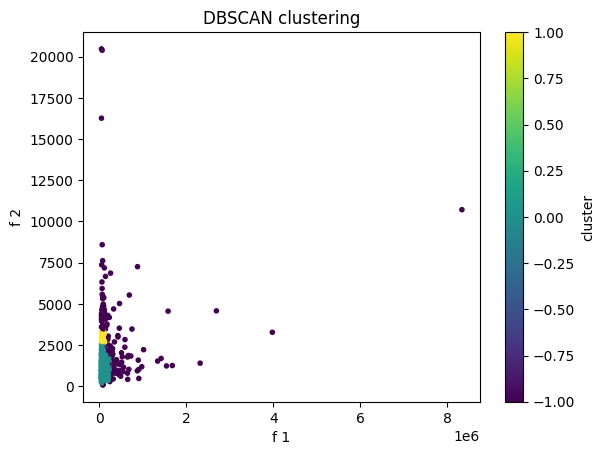

cluster sizes:
 0    521
-1    145
 1     35
Name: count, dtype: int64
eps=0.1, min_samples=15: 3 clusters


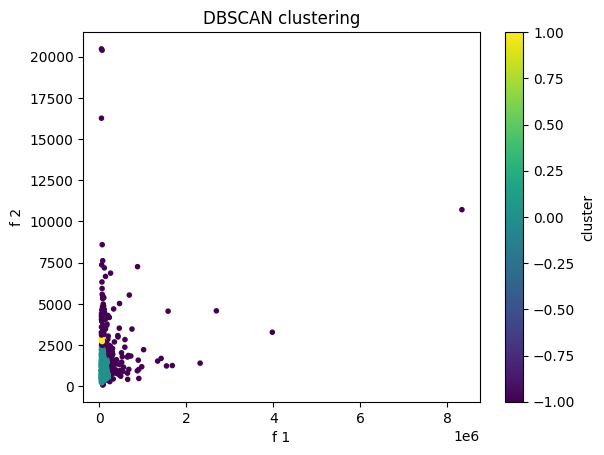

cluster sizes:
 0    487
-1    196
 1     18
Name: count, dtype: int64
eps=0.1, min_samples=20: 2 clusters


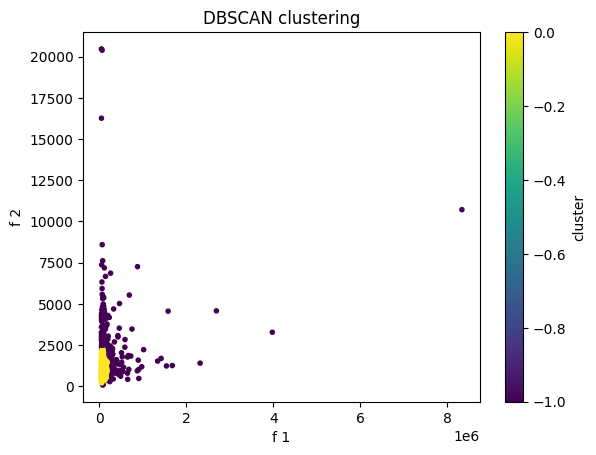

cluster sizes:
 0    464
-1    237
Name: count, dtype: int64
eps=0.1, min_samples=25: 2 clusters


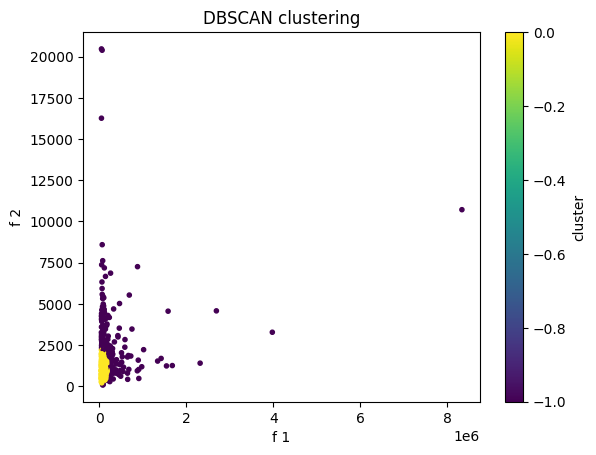

cluster sizes:
 0    452
-1    249
Name: count, dtype: int64
eps=0.5, min_samples=5: 2 clusters


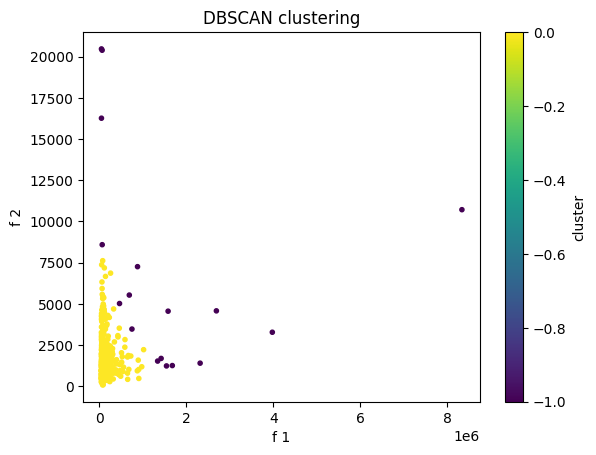

cluster sizes:
 0    684
-1     17
Name: count, dtype: int64
eps=0.5, min_samples=10: 2 clusters


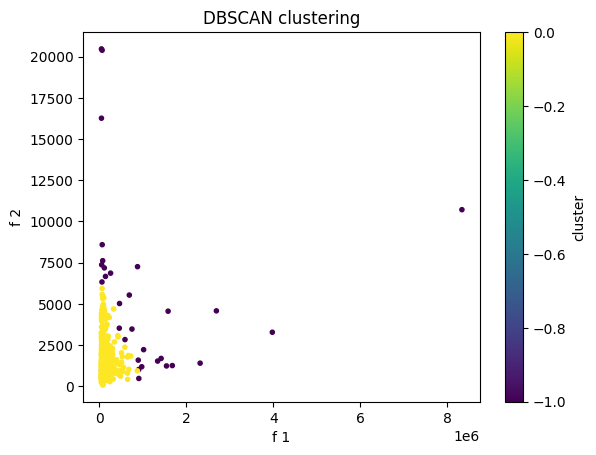

cluster sizes:
 0    671
-1     30
Name: count, dtype: int64
eps=0.5, min_samples=15: 2 clusters


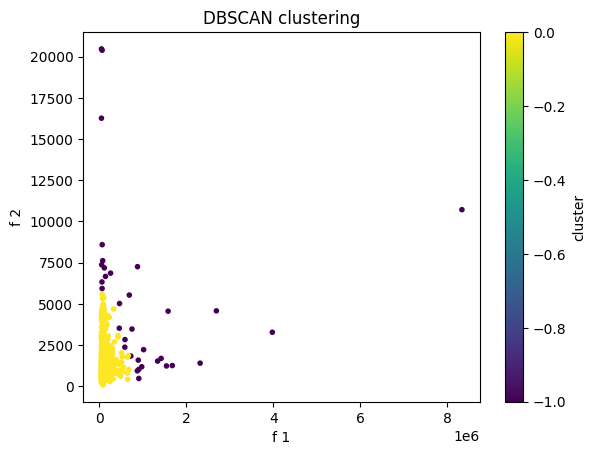

cluster sizes:
 0    667
-1     34
Name: count, dtype: int64
eps=0.5, min_samples=20: 2 clusters


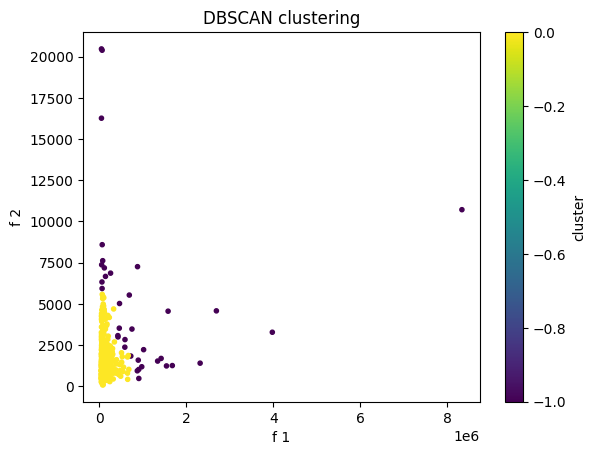

cluster sizes:
 0    665
-1     36
Name: count, dtype: int64
eps=0.5, min_samples=25: 2 clusters


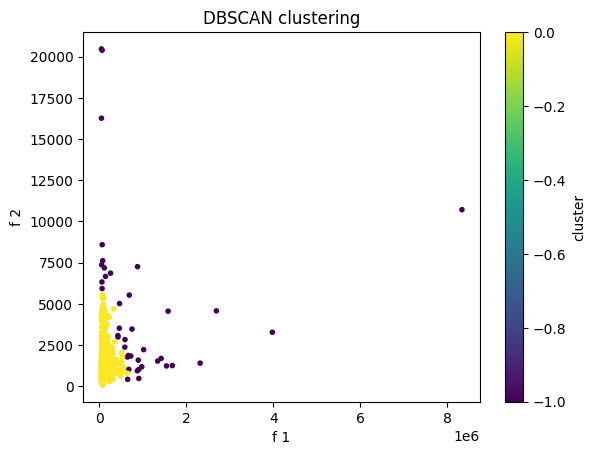

cluster sizes:
 0    661
-1     40
Name: count, dtype: int64
eps=1.0, min_samples=5: 2 clusters


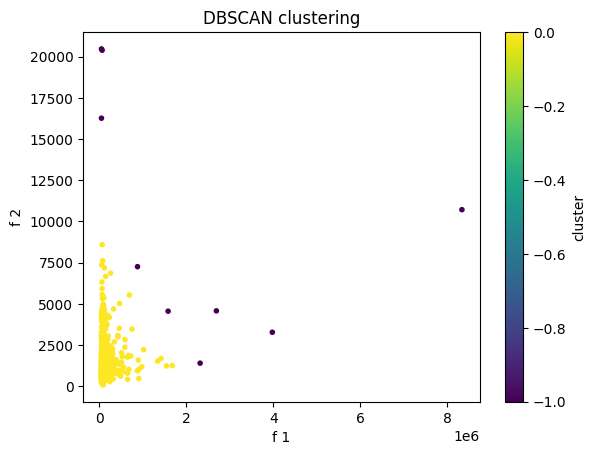

cluster sizes:
 0    692
-1      9
Name: count, dtype: int64
eps=1.0, min_samples=10: 2 clusters


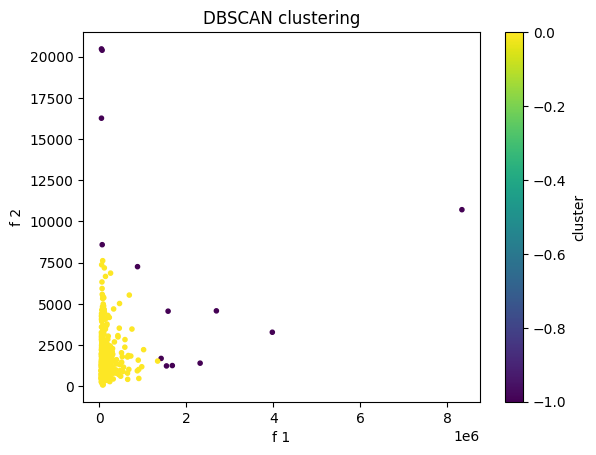

cluster sizes:
 0    688
-1     13
Name: count, dtype: int64
eps=1.0, min_samples=15: 2 clusters


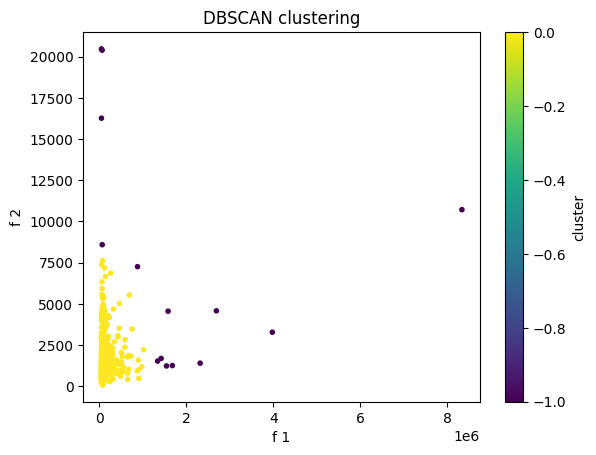

cluster sizes:
 0    687
-1     14
Name: count, dtype: int64
eps=1.0, min_samples=20: 2 clusters


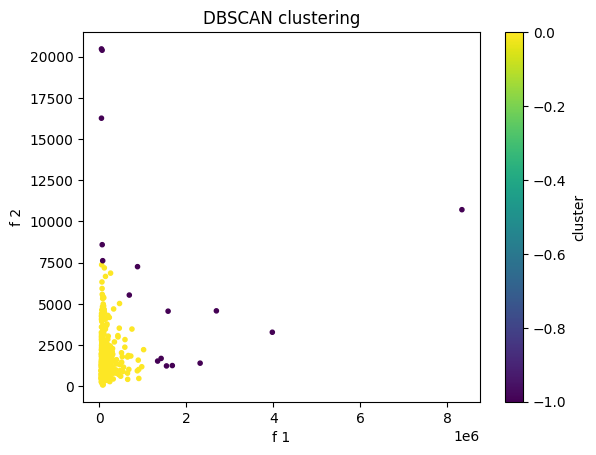

cluster sizes:
 0    685
-1     16
Name: count, dtype: int64
eps=1.0, min_samples=25: 2 clusters


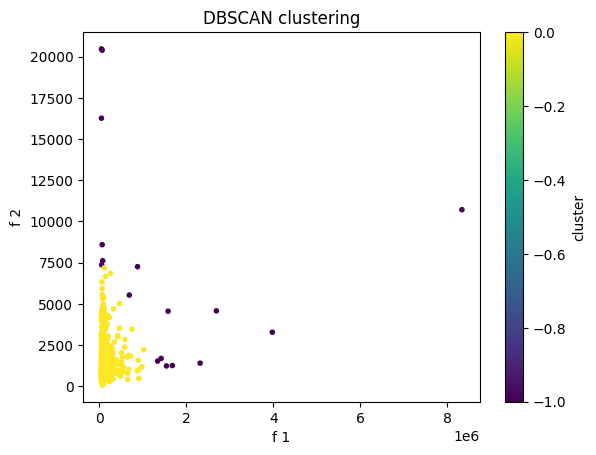

cluster sizes:
 0    684
-1     17
Name: count, dtype: int64
Best parameters:
eps=1.0, min_samples=5
Best silhouette score: 0.9264339912734447
Clusters with best parameters: 2


In [11]:


# read in csv
def read_dataset(file_path):
    return pd.read_csv(file_path)


# replace missing values
def handle_missing_values(data):
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    return imputer.fit_transform(data)


def dbscan_clustering(data, eps, min_samples):
    # standardize
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    # run DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)
    return clusters


def plot_clusters(data, clusters):
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='.')
    plt.xlabel('f 1')
    plt.ylabel('f 2')
    plt.title('DBSCAN clustering')
    plt.colorbar(label='cluster')
    plt.show()


def main():
    # read in dataset
    file_path = "data/numerical_data.csv"  # Change this to your dataset path
    dataset = read_dataset(file_path)
    
    # sel rand features for clustering
    features = dataset[['city_population', 'density']].values
    
    # replace missing values
    features = handle_missing_values(features)
    
    # DBSCAN params
    eps = [0.01, 0.05, 0.1, 0.5, 1.0]
    min_samples = [5, 10, 15, 20, 25]
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    # perform DBSCAN with grid search
    for e in eps:
        for m in min_samples:
            clusters = dbscan_clustering(features, e, m)
            if len(set(clusters)) == 1:
                continue
            print(f"eps={e}, min_samples={m}: {len(set(clusters))} clusters")
            plot_clusters(features, clusters)

            # get silhouette score & cluster sizes
            silhouette = silhouette_score(features, clusters)
            cluster_sizes = pd.Series(clusters).value_counts()
            print("cluster sizes:")
            print(cluster_sizes)

            # update best silhouette score
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = e
                best_min_samples = m


    print("Best parameters:")
    print(f"eps={best_eps}, min_samples={best_min_samples}")
    print(f"Best silhouette score: {best_silhouette}")
    print(f"Clusters with best parameters: {len(set(clusters))}")
if __name__ == "__main__":
    main()

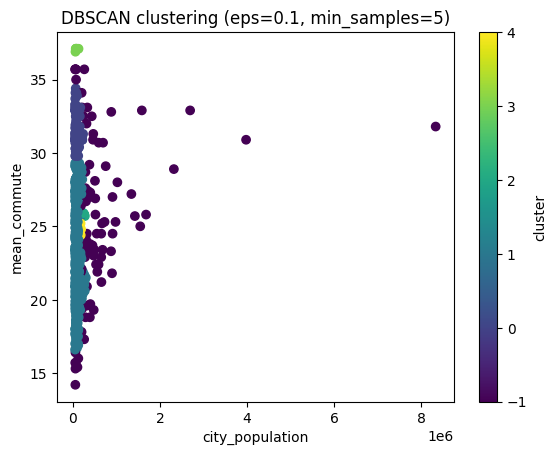

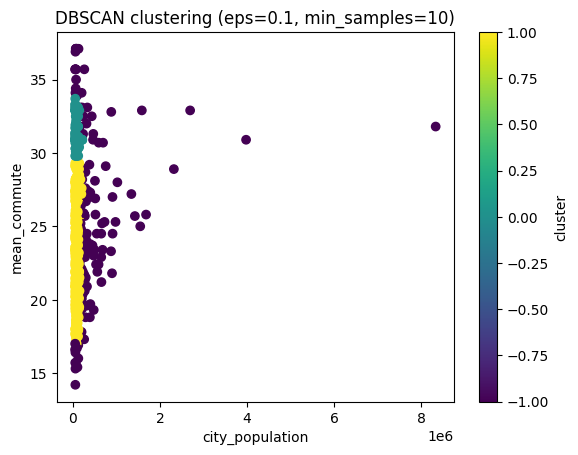

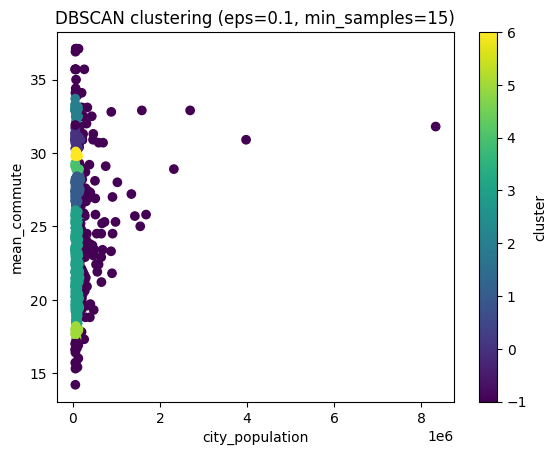

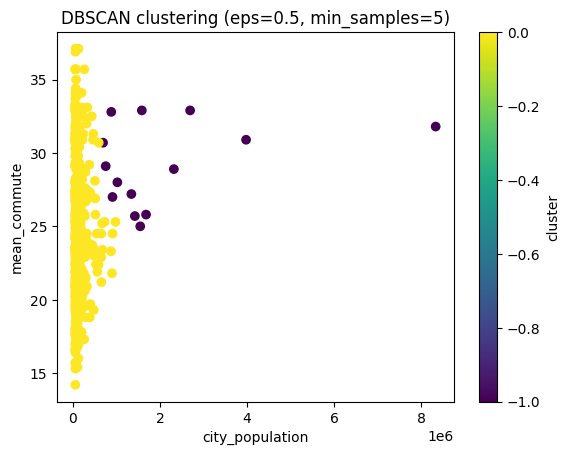

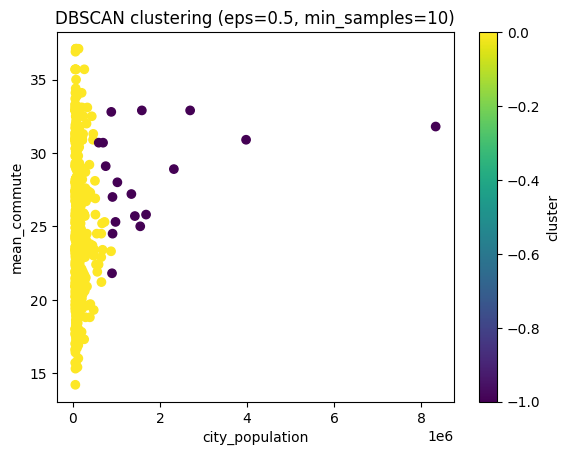

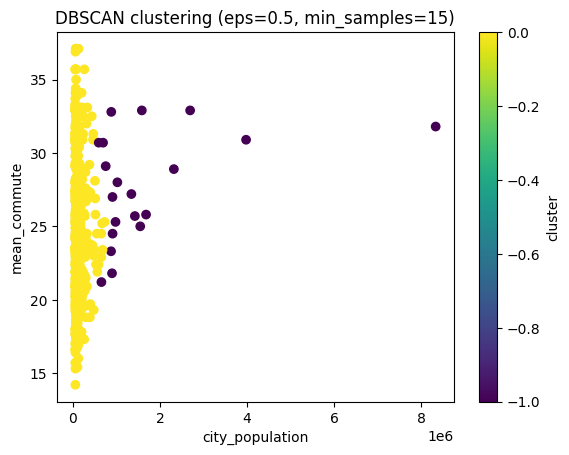

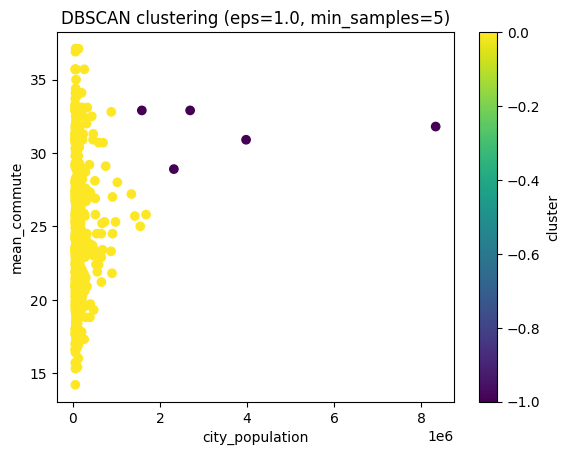

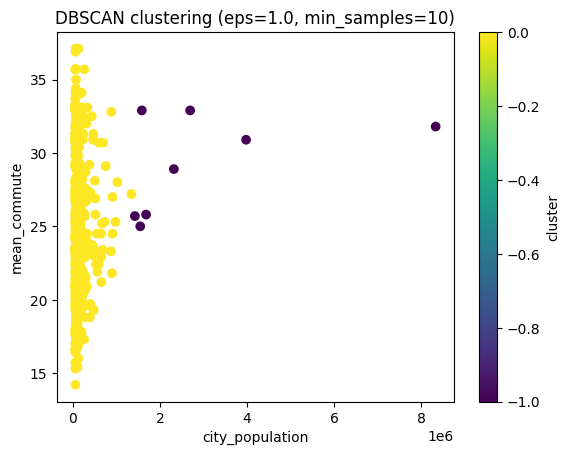

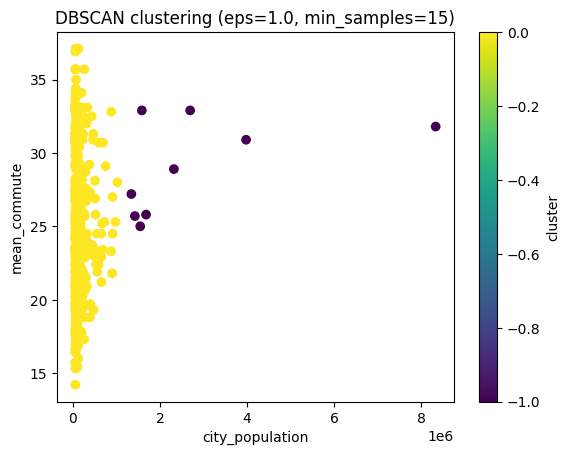

best parameters: eps=1.0, min_samples=5
silhouette score: 0.8545182787331888
all scores: [-0.0657956618804551, 0.23438862843768463, 0.05024795675925574, 0.7416369491019833, 0.7054867956182655, 0.689222386343218, 0.8545182787331888, 0.8141204190306134, 0.8028839432900532]


In [12]:
# CITY POPULATION & MEAN COMMUTE

data = pd.read_csv("data/numerical_data.csv")

# sel two features for clustering
features = data[['city_population', 'mean_commute']].values

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# grid search params
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

# track silhouette score
silhouette_scores = []

# grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        
        # apply labels to clusters
        unique_labels = set(clusters)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        
        # get silhouette score
        score = silhouette_score(scaled_features, clusters)
        silhouette_scores.append(score)
        
        # update best score & parameters
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_clusters = clusters
        
        # plot ze clusters
        plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis')
        plt.xlabel('city_population')
        plt.ylabel('mean_commute')
        plt.title(f'DBSCAN clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='cluster')
        plt.show()

# print results
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'silhouette score: {best_score}')
print(f'all scores: {silhouette_scores}')


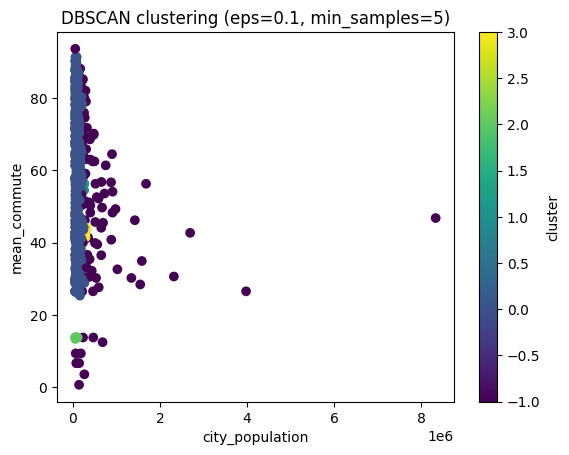

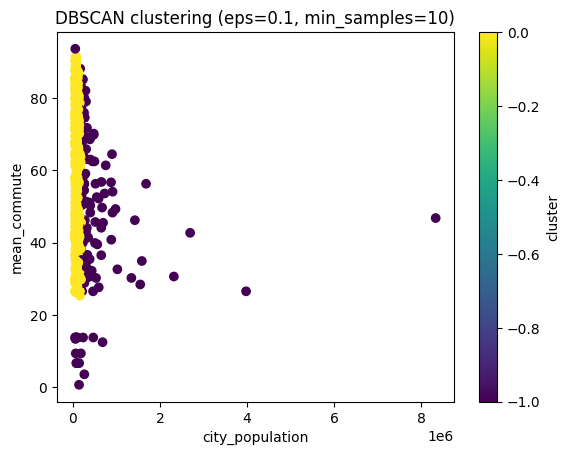

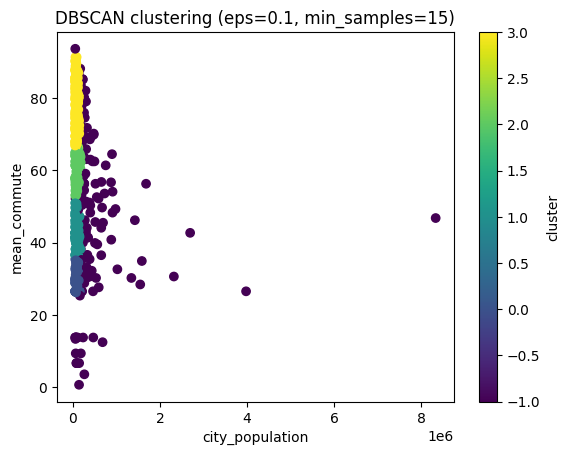

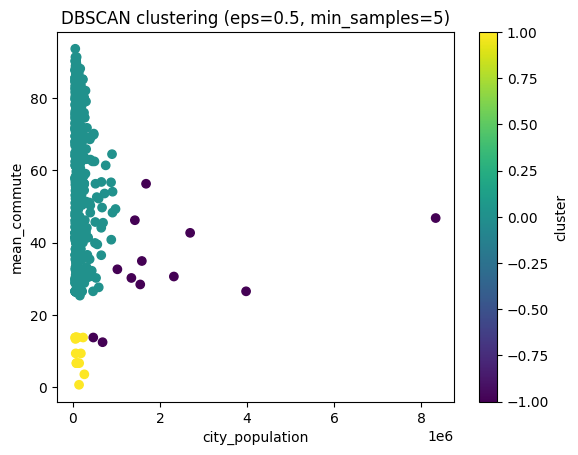

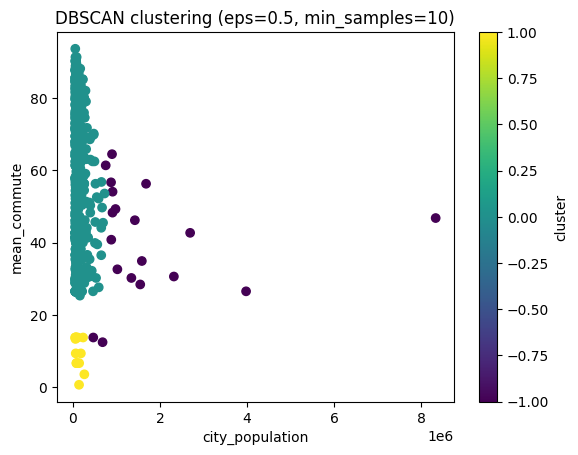

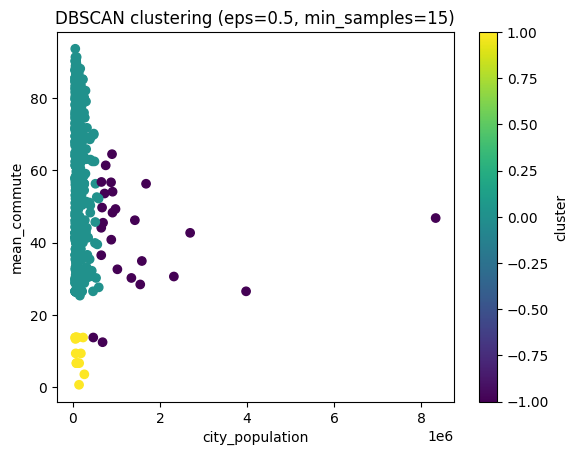

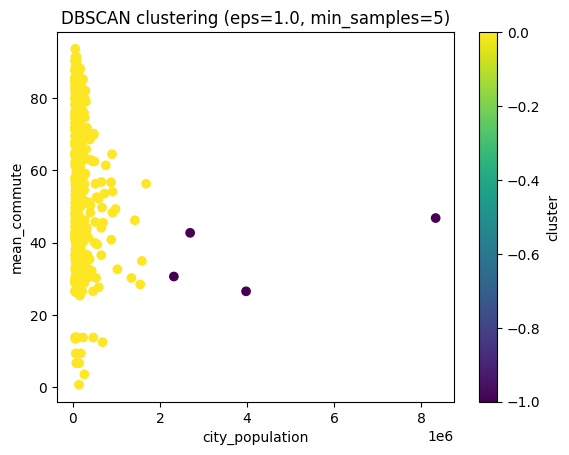

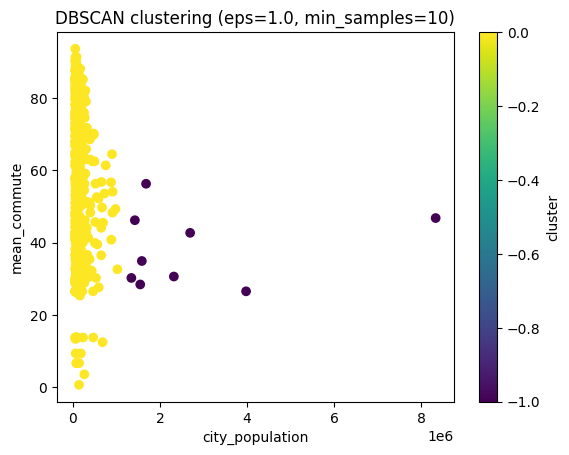

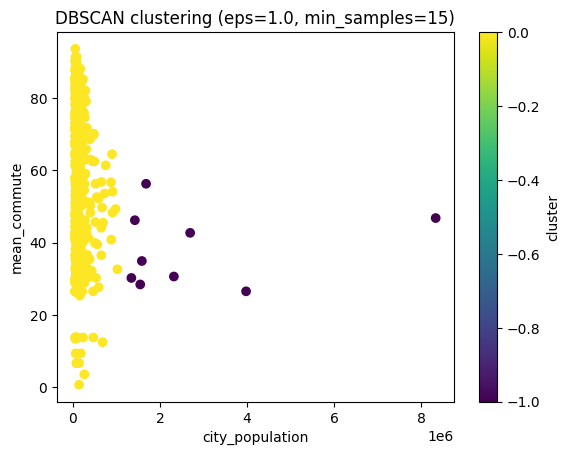

best parameters: eps=1.0, min_samples=5
silhouette score: 0.872090112411566
all scores: [-0.3192743841060368, 0.2543882949161935, 0.2972893663035938, 0.39930806020171505, 0.399924860895332, 0.3993016358306586, 0.872090112411566, 0.8035850706252762, 0.8035850706252762]


In [ ]:
# CITY POPULATION & PCT_WHITE

# load data
data = pd.read_csv("data/numerical_data.csv")

# select 2 features for clustering
features = data[['city_population', 'pct_white']].values

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# grid search parameters
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

# track silhouette score & best parameters
silhouette_scores = []

# DO grid search
for eps in eps_values:
    for min_samples in min_samples_values:

        # DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        
        # label clusters
        unique_labels = set(clusters)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        
        # get silhouette score
        score = silhouette_score(scaled_features, clusters)
        silhouette_scores.append(score)
        
        # update best score and parameters
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_clusters = clusters
        
        # plot! clusters
        plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis')
        plt.xlabel('city_population')
        plt.ylabel('mean_commute')
        plt.title(f'DBSCAN clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='cluster')
        plt.show()

# print best parameters and silhouette score
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'silhouette score: {best_score}')
print(f'all scores: {silhouette_scores}')

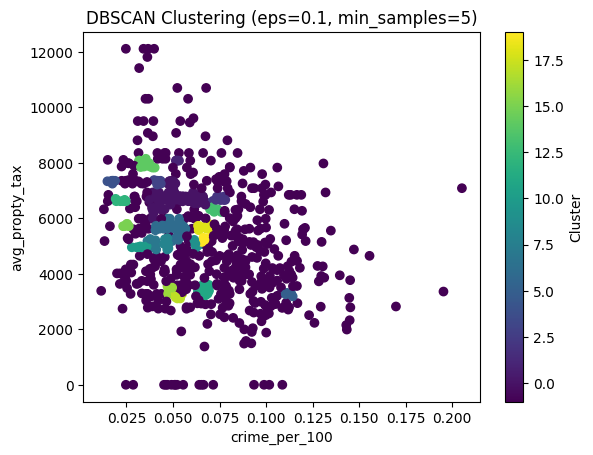

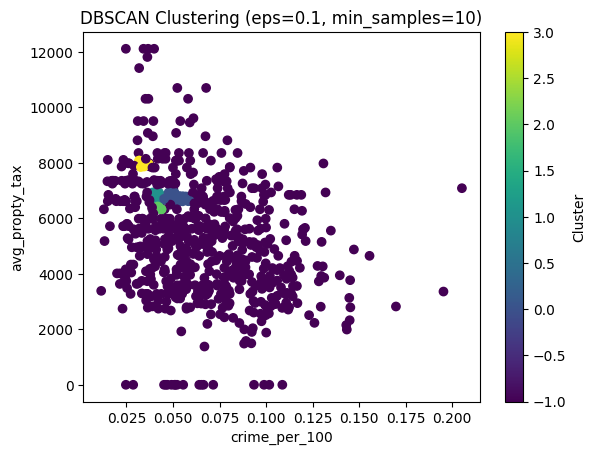

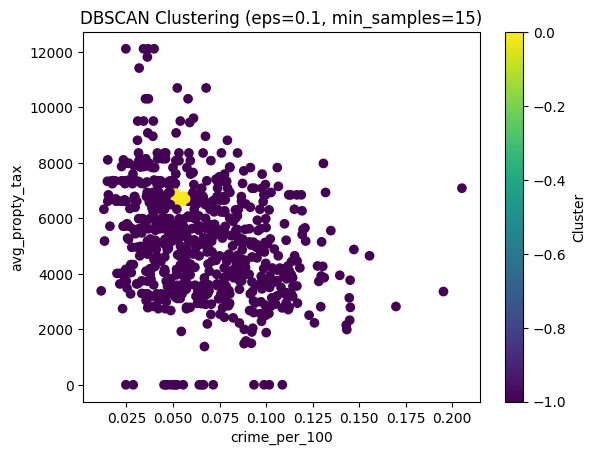

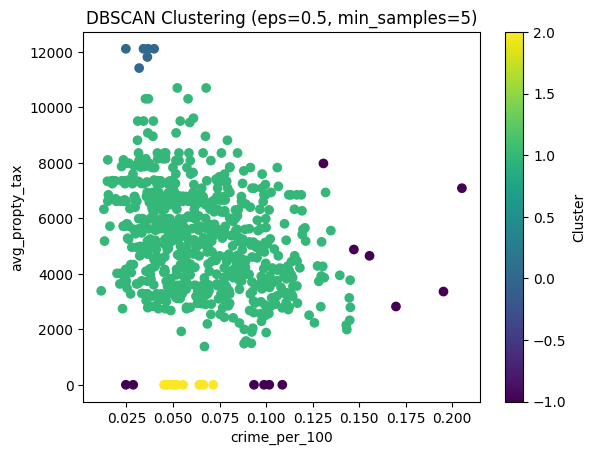

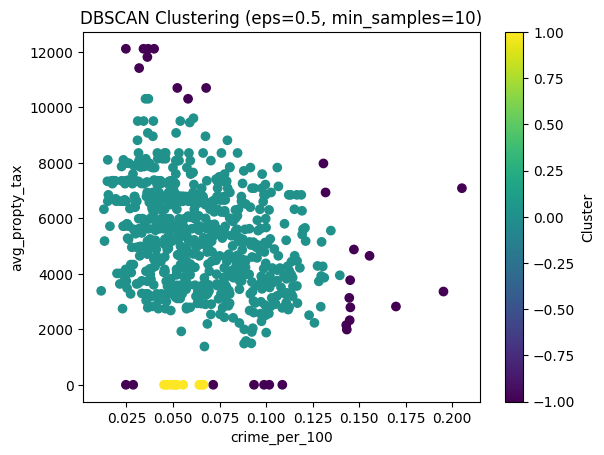

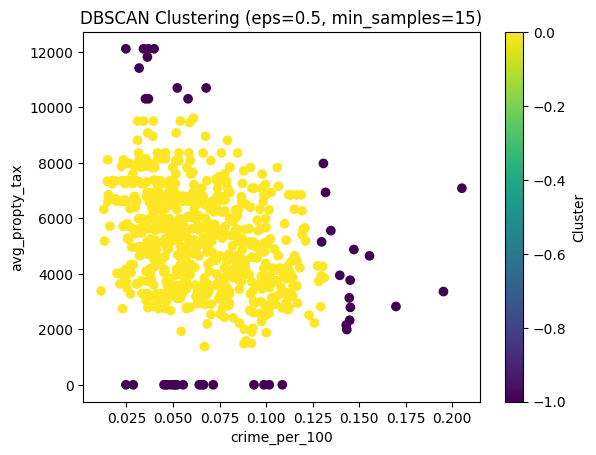

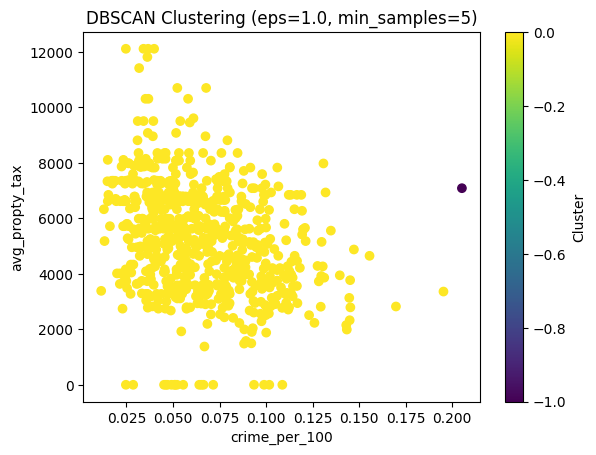

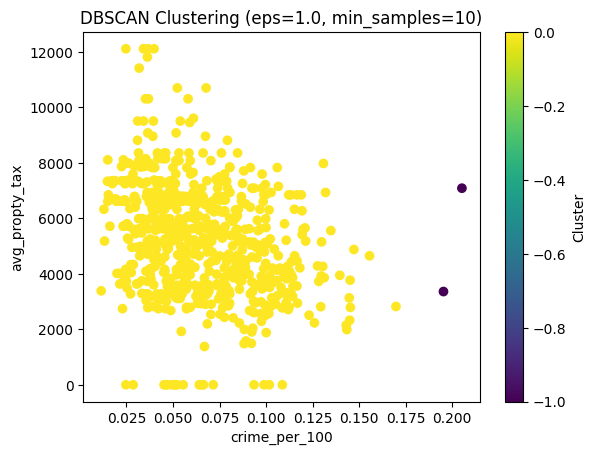

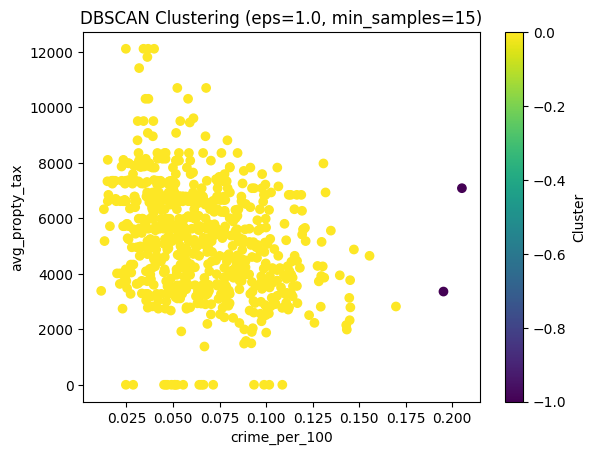

best parameters: eps=1.0, min_samples=5
silhouette score: 0.6308741275864485
all scores: [-0.31248023747495857, -0.18826372929722632, -0.19632669746849538, 0.2988250393258001, 0.37162555345907233, 0.45599595049754227, 0.6308741275864485, 0.6174542190466663, 0.6174542190466663]


In [ ]:
# CRIME RATE & AVG PROPERTY TAX
# metric: silhouette score

data = pd.read_csv("data/numerical_data.csv")
features = data[['crime_per_100', 'avg_propty_tax']].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

# track silhouette score and best parameters
silhouette_scores = []

# perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN clustering!
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        
        # label clusters
        unique_labels = set(clusters)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        
        # compute silhouette score
        score = silhouette_score(scaled_features, clusters)
        silhouette_scores.append(score)
        
        # update best score and parameters
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_clusters = clusters
        
        # plot ze clusters
        plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis')
        plt.xlabel('crime_per_100')
        plt.ylabel('avg_propty_tax')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='Cluster')
        plt.show()

# print best parameters and silhouette score
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'silhouette score: {best_score}')
print(f'all scores: {silhouette_scores}')

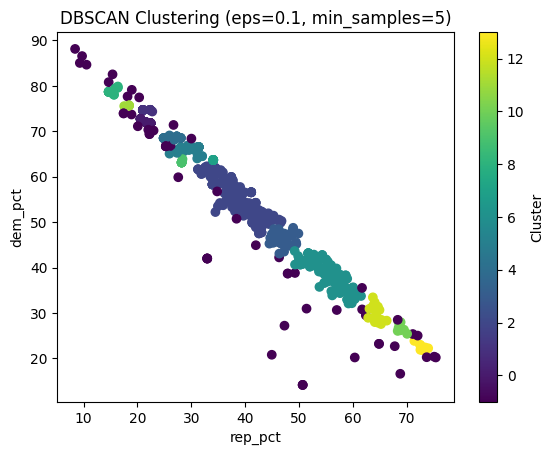

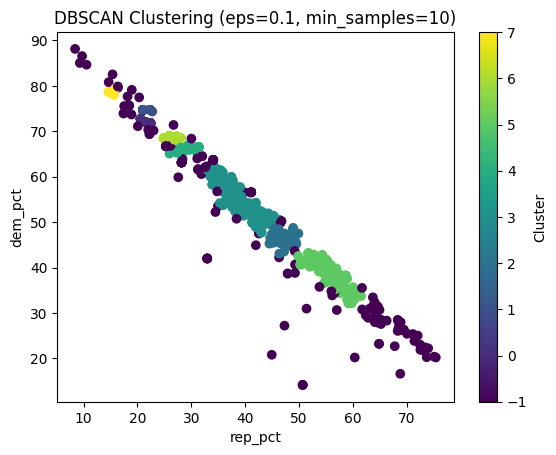

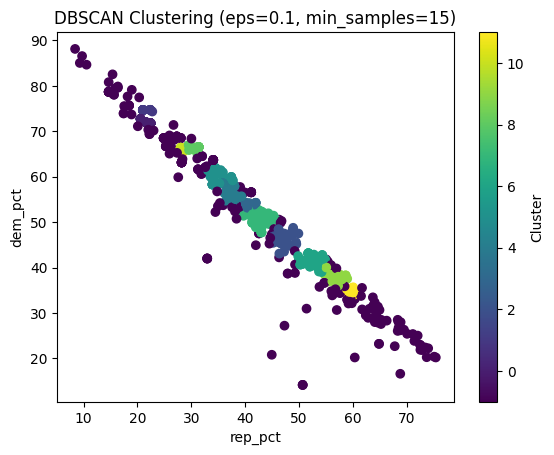

number of clusters: 1
best parameters: eps=0.1, min_samples=5
silhouette score: 0.2852802115953914
all scores: [0.2852802115953914, 0.23714700046650247, 0.12611862680993863]


In [ ]:
# DBSCAN: DEMOCRATIC PERCENTAGE & REPUBLICAN PERCENTAGE
# metric = silhouette_score

data = pd.read_csv("data/numerical_data.csv")
features = data[['rep_pct', 'dem_pct']].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

# track silhouette score and best parameters
silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # DO DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        
        # label clusters
        unique_labels = set(clusters)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        if num_clusters < 2:
            continue
        
        # compute silhouette score
        score = silhouette_score(scaled_features, clusters)
        silhouette_scores.append(score)
        
        # update best score and parameters
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_clusters = clusters
        
        # plot ze clusters
        plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis')
        plt.xlabel('rep_pct')
        plt.ylabel('dem_pct')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='Cluster')
        plt.show()

# print res
unique_labels = set(clusters)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'number of clusters: {num_clusters}')
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'silhouette score: {best_score}')
print(f'all scores: {silhouette_scores}')

In [ ]:
# DBSCAN: ALL FEATURE COMBINATIONS
# metric: silhouette_score

data = pd.read_csv("data/numerical_data.csv")
features = data[['index', 'city_population', 'county_population', 'density', 'pct_men', 'pct_women', 'pct_hispanic', 'pct_white', 'pct_black', 'pct_native', 'pct_asian', 'pct_pacific', 'pct_unemployed', 'pct_professional', 'pct_service', 'pct_office', 'pct_construction', 'pct_production', 'pct_drive', 'pct_carpool', 'pct_transit', 'pct_walk', 'pct_other_transportation', 'pct_work_at_home', 'pct_private_work', 'pct_public_work', 'pct_self_employed', 'pct_family_work', 'avg_income', 'income_error', 'income_per_cap', 'income_per_cap_err', 'mean_commute', 'covid_cases_per_100k', 'LTM_mean_temp', 'LTM_mean_percipitation', 'LTM_min_temp', 'LTM_max_temp', 'age29andunder_pct', 'age65andolder_pct', 'rural_pct', 'ruralurban_cc', 'rep_pct', 'dem_pct', 'crime_per_100', 'avg_propty_tax']].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # do DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        if len(set(clusters)) < 2:
            continue
        
        # compute silhouette score
        score = silhouette_score(scaled_features, clusters)
        
        # update best score and parameters
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# print best silhouette score and parameters
print(f'best silhouette score: {best_score}')
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')


best silhouette score: -0.00873037441170663
best parameters: eps=0.5, min_samples=10


best silhouette score: 0.9572919913674185
best parameters: eps=0.1, min_samples=5
best feature pair: pct_family_work, ruralurban_cc
number of clusters: 10


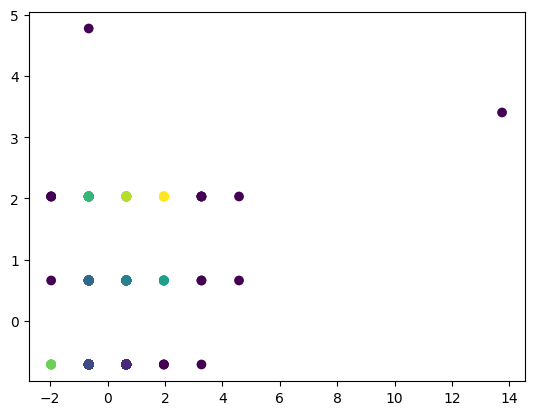

In [13]:

# metric: Silhouette score

data = pd.read_csv("data/numerical_data.csv")
features = data[['index', 'city_population', 'county_population', 'density', 'pct_men', 'pct_women', 'pct_hispanic', 'pct_white', 'pct_black', 'pct_native', 'pct_asian', 'pct_pacific', 'pct_unemployed', 'pct_professional', 'pct_service', 'pct_office', 'pct_construction', 'pct_production', 'pct_drive', 'pct_carpool', 'pct_transit', 'pct_walk', 'pct_other_transportation', 'pct_work_at_home', 'pct_private_work', 'pct_public_work', 'pct_self_employed', 'pct_family_work', 'avg_income', 'income_error', 'income_per_cap', 'income_per_cap_err', 'mean_commute', 'covid_cases_per_100k', 'LTM_mean_temp', 'LTM_mean_percipitation', 'LTM_min_temp', 'LTM_max_temp', 'age29andunder_pct', 'age65andolder_pct', 'rural_pct', 'ruralurban_cc', 'rep_pct', 'dem_pct', 'crime_per_100', 'avg_propty_tax']].values

# standarsize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define range of values
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None

# grid search
for i in range(len(features[0])-1):
    for j in range(i+1, len(features[0])):
        # sel pair of features
        pair_features = scaled_features[:, [i, j]]
        
        # do DBSCAN clustering
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                clusters = dbscan.fit_predict(pair_features)
                if len(set(clusters)) < 2:
                    continue
                
                # compute silhouette score
                score = silhouette_score(pair_features, clusters)
                
                # update best score and parameters
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = clusters
                    best_features = (i, j)

# output results
print(f'best silhouette score: {best_score}')
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'best feature pair: {data.columns[best_features[0]]}, {data.columns[best_features[1]]}')
print(f'number of clusters: {len(set(best_clusters))}')
plt.xlabel('best_features[0]')
plt.ylabel('best_features[1]')
plt.title('best DBSCAN clustering')
# show a key for each cluster
plt.colorbar(label='cluster')
plt.show()
plt.scatter(scaled_features[:, best_features[0]], scaled_features[:, best_features[1]], c=best_clusters, cmap='viridis')


In [ ]:
print(len([
    "index", "city_population", "county_population", "density", "pct_men", "pct_women",
    "pct_hispanic", "pct_white", "pct_black", "pct_native", "pct_asian", "pct_pacific",
    "pct_unemployed", "pct_professional", "pct_service", "pct_office", "pct_construction",
    "pct_production", "pct_drive", "pct_carpool", "pct_transit", "pct_walk", "pct_other_transportation",
    "pct_work_at_home", "pct_private_work", "pct_public_work", "pct_self_employed", "pct_family_work",
    "avg_income", "income_error", "income_per_cap", "income_per_cap_err", "mean_commute", "covid_cases_per_100k",
    "LTM_mean_temp", "LTM_mean_percipitation", "LTM_min_temp", "LTM_max_temp", "age29andunder_pct",
    "age65andolder_pct", "rural_pct", "ruralurban_cc", "rep_pct", "dem_pct", "crime_per_100", "avg_propty_tax"
]))


46


Best silhouette score: 0.8512573431954619
Best Davies-Bouldin index: 0.13176612933304682
Best parameters: eps=1.0, min_samples=5
Best features: (4, 5)


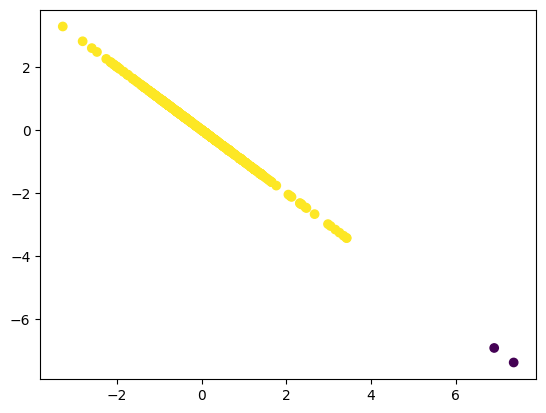

In [16]:
# metrics: silhouette score + Davies-Bouldin index

# load data
data = pd.read_csv("data/numerical_data.csv")

# get all features
features = data[['index', 'city_population', 'county_population', 'density', 'pct_men', 'pct_women', 'pct_hispanic', 'pct_white', 'pct_black', 'pct_native', 'pct_asian', 'pct_pacific', 'pct_unemployed', 'pct_professional', 'pct_service', 'pct_office', 'pct_construction', 'pct_production', 'pct_drive', 'pct_carpool', 'pct_transit', 'pct_walk', 'pct_other_transportation', 'pct_work_at_home', 'pct_private_work', 'pct_public_work', 'pct_self_employed', 'pct_family_work', 'avg_income', 'income_error', 'income_per_cap', 'income_per_cap_err', 'mean_commute', 'covid_cases_per_100k', 'LTM_mean_temp', 'LTM_mean_percipitation', 'LTM_min_temp', 'LTM_max_temp', 'age29andunder_pct', 'age65andolder_pct', 'rural_pct', 'ruralurban_cc', 'rep_pct', 'dem_pct', 'crime_per_100', 'avg_propty_tax']].values

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define vals
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_combined_score = -1
best_eps = None
best_min_samples = None
best_db_score = None

# do grid search for each pair of features
for i in range(len(features[0])-1):
    for j in range(i+1, len(features[0])):

        # select pair of features
        pair_features = scaled_features[:, [i, j]]
        
        # do DBSCAN clustering
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                clusters = dbscan.fit_predict(pair_features)
                if len(set(clusters)) < 2:
                    continue
                
                # compute silhouette score
                score = silhouette_score(pair_features, clusters)
                # compute Davies-Bouldin index
                db_idx = davies_bouldin_score(pair_features, clusters)
                
                # compute combined score
                combined_score = score / db_idx
                
                # update best score and parameters
                if combined_score > best_combined_score:
                    best_combined_score = combined_score
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = clusters
                    best_features = (i, j)
                    best_db_score = db_idx

# print best silhouette score, Davies-Bouldin index, and parameters
print(f'Best silhouette score: {best_score}')
print(f'Best Davies-Bouldin index: {best_db_score}')
print(f'Best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'Best features: {best_features}')

# print best feature DBSCAN clustering
plt.scatter(scaled_features[:, best_features[0]], scaled_features[:, best_features[1]], c=best_clusters, cmap='viridis')


[[20.20534467  0.02917395  5.38978904 ...  2.31084138 -0.96476621
   3.19932807]
 [ 9.42890714  3.66921642  0.97139956 ...  1.28411381 -0.36676076
   0.71683284]
 [ 0.7307033   3.66921642  1.11810506 ...  1.28411381  0.05221149
   0.71683284]
 ...
 [-0.28753087 -0.63207308 -0.66849469 ... -2.17636134  2.67823575
  -1.64863133]
 [-0.29059025 -0.65623467 -0.82054574 ... -2.28896256  0.36395813
  -1.37681515]
 [-0.29838585 -0.60222479 -0.63582748 ... -1.10354485  2.73056929
  -1.48278382]]
best Davies-Bouldin score: 8.257135940376022
best parameters: eps=0.5, min_samples=10
best features: LTM_mean_temp, rep_pct
number of clusters: 4


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

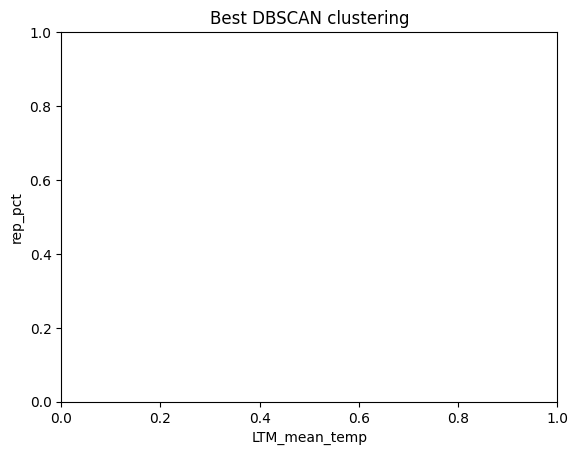

In [32]:
# metric: Davies-Bouldin index

# load data
data = pd.read_csv("data/numerical_data.csv")
data = data.drop(columns=['index'])
# get all features except the index
features = data[['city_population', 'county_population', 'density', 'pct_men', 'pct_women', 'pct_hispanic', 'pct_white', 'pct_black', 'pct_native', 'pct_asian', 'pct_pacific', 'pct_unemployed', 'pct_professional', 'pct_service', 'pct_office', 'pct_construction', 'pct_production', 'pct_drive', 'pct_carpool', 'pct_transit', 'pct_walk', 'pct_other_transportation', 'pct_work_at_home', 'pct_private_work', 'pct_public_work', 'pct_self_employed', 'pct_family_work', 'avg_income', 'income_error', 'income_per_cap', 'income_per_cap_err', 'mean_commute', 'covid_cases_per_100k', 'LTM_mean_temp', 'LTM_mean_percipitation', 'LTM_min_temp', 'LTM_max_temp', 'age29andunder_pct', 'age65andolder_pct', 'rural_pct', 'ruralurban_cc', 'rep_pct', 'dem_pct', 'crime_per_100', 'avg_propty_tax']].values

# standarsize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)
# define range of values for eps and min_samples
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = float('-inf')
best_eps = None
best_min_samples = None
best_clusters = None

for i in range(len(scaled_features[0])-1):
    for j in range(i+1, len(scaled_features[0])):

        # select pair of features
        pair_features = scaled_features[:, [i, j]]

    # do grid search
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Perform DBSCAN clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(pair_features)
            if len(set(clusters)) < 2:
                continue
            
            # compute Davies-Bouldin score
            db_score = davies_bouldin_score(pair_features, clusters)
            
            # update best score and parameters
            if db_score > best_score:
                best_score = db_score
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = clusters

# print best Davies-Bouldin score and parameters
print(f'best Davies-Bouldin score: {best_score}')
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
# output best feature names
print(f'best features: {data.columns[best_features[0]]}, {data.columns[best_features[1]]}')
print(f'number of clusters: {len(set(best_clusters))}') 
# print best feature DBscan clustering
plt.xlabel(data.columns[best_features[0]])
plt.ylabel(data.columns[best_features[1]])
plt.title('Best DBSCAN clustering')
plt.colorbar(label='cluster')
plt.scatter(scaled_features[:, best_features[0]], scaled_features[:, best_features[1]], c=best_clusters, cmap='viridis')


Calinski-Harabasz Index: 20.96274875666885
parameters: eps=1.0, min_samples=15
feature names: city_population, dem_pct
clusters: 3


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

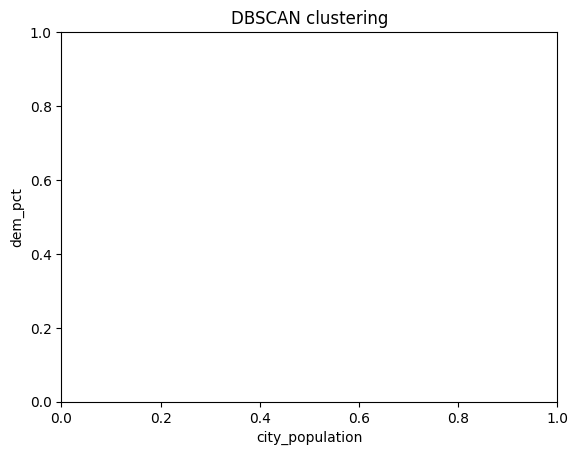

In [30]:
# metric: Calinski-Harabasz index

# load data
data = pd.read_csv("data/numerical_data.csv")
data = data.drop(columns=['index'])

# select all features
features = data[['city_population', 'county_population', 'density', 'pct_men', 'pct_women', 'pct_hispanic', 'pct_white', 'pct_black', 'pct_native', 'pct_asian', 'pct_pacific', 'pct_unemployed', 'pct_professional', 'pct_service', 'pct_office', 'pct_construction', 'pct_production', 'pct_drive', 'pct_carpool', 'pct_transit', 'pct_walk', 'pct_other_transportation', 'pct_work_at_home', 'pct_private_work', 'pct_public_work', 'pct_self_employed', 'pct_family_work', 'avg_income', 'income_error', 'income_per_cap', 'income_per_cap_err', 'mean_commute', 'covid_cases_per_100k', 'LTM_mean_temp', 'LTM_mean_percipitation', 'LTM_min_temp', 'LTM_max_temp', 'age29andunder_pct', 'age65andolder_pct', 'rural_pct', 'ruralurban_cc', 'rep_pct', 'dem_pct', 'crime_per_100', 'avg_propty_tax']].values

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# def range of values for eps and min_samples
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = float('-inf')
best_eps = None
best_min_samples = None
best_clusters = None

# do grid search!!
for i in range(len(scaled_features[0])-1):
    for j in range(i+1, len(scaled_features[0])): 
        for eps in eps_values:
            for min_samples in min_samples_values:
                # do DBSCAN clustering
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                clusters = dbscan.fit_predict(scaled_features)
                if len(set(clusters)) < 2:
                    continue
                
                # get Calinski-Harabasz Index
                ch_score = calinski_harabasz_score(scaled_features, clusters)
                
                # update best score and parameters
                if ch_score > best_score:
                    best_score = ch_score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = clusters

# print BEST Calinski-Harabasz Index & parameters:D
print(f'Calinski-Harabasz Index: {best_score}')
print(f'parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'feature names: {data.columns[best_features[0]]}, {data.columns[best_features[1]]}')
print(f'clusters: {len(set(best_clusters))}')

# print number of clusters in best scan
unique_labels = set(best_clusters)

# print best feature DBscan clustering
# add a key to plot and x/y axes
plt.xlabel(data.columns[best_features[0]])
plt.ylabel(data.columns[best_features[1]])
plt.title('DBSCAN clustering')
plt.colorbar(label='cluster')
plt.scatter(scaled_features[:, best_features[0]], scaled_features[:, best_features[1]], c=best_clusters, cmap='viridis')


In [ ]:
# metric: gap statistic

# load data
data = np.loadtxt("data/numerical_data.csv", delimiter=",", skiprows=1)

# define the range of vals for k
k_values = range(2, 10)

# compute gap statistic for each k
gap_values = []
for k in k_values:
    # fits KMeans clustering model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    
    # compute within-cluster dispersion
    within_dispersion = kmeans.inertia_
    
    # gen reference data
    reference_data = np.random.uniform(low=np.min(data, axis=0), high=np.max(data, axis=0), size=(data.shape[0], data.shape[1]))
    
    # fit KMeans clustering model on reference data
    reference_kmeans = KMeans(n_clusters=k)
    reference_kmeans.fit(reference_data)
    
    # compute within-cluster dispersion for reference data
    reference_within_dispersion = reference_kmeans.inertia_
    
    # compute gap statistic
    gap = np.log(reference_within_dispersion) - np.log(within_dispersion)
    
    # Append gap value to list
    gap_values.append(gap)

# find the optimal number of clusters
optimal_k = np.argmax(gap_values) + 2

# print the optimal number
print(f'optimal number of clusters: {optimal_k}')

# find the optimal num of clusters
optimal_k = np.argmax(gap_values) + 2

# print the optimal number
print(f'optimal # of clusters: {optimal_k}')

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

optimal number of clusters: 9
optimal # of clusters: 9


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


best SSE: 982977.0618709673
best parameters: eps=0.5, min_samples=5
best feature pair: LTM_mean_temp, rep_pct
number of clusters: 2


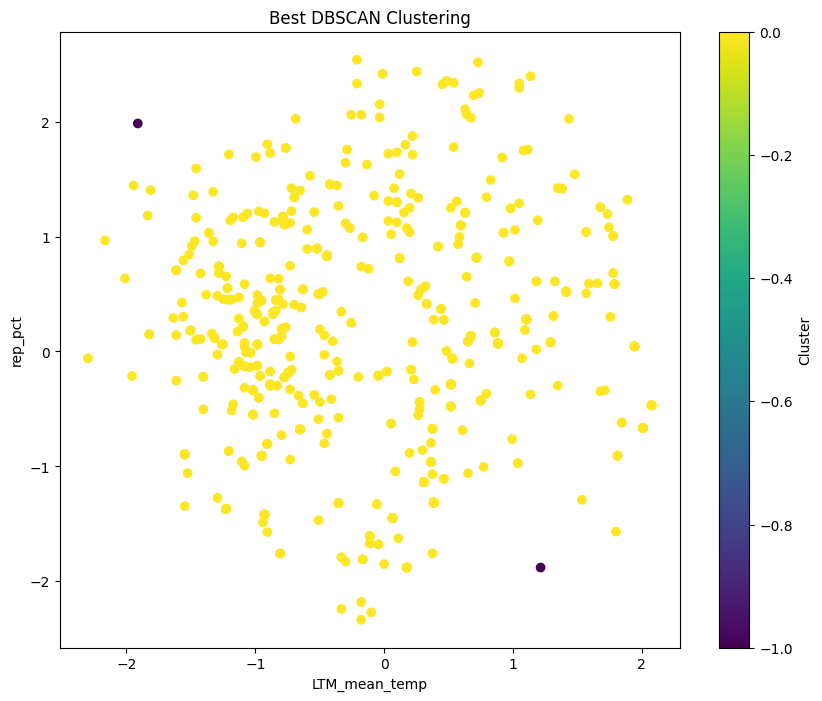

In [31]:
# SSE + SILHOUETTE SCORE

data = pd.read_csv("data/numerical_data.csv")
data = data.drop(columns=['index'])
features = data[['city_population', 'county_population', 'density', 'pct_men', 'pct_women', 'pct_hispanic', 'pct_white', 'pct_black', 'pct_native', 'pct_asian', 'pct_pacific', 'pct_unemployed', 'pct_professional', 'pct_service', 'pct_office', 'pct_construction', 'pct_production', 'pct_drive', 'pct_carpool', 'pct_transit', 'pct_walk', 'pct_other_transportation', 'pct_work_at_home', 'pct_private_work', 'pct_public_work', 'pct_self_employed', 'pct_family_work', 'avg_income', 'income_error', 'income_per_cap', 'income_per_cap_err', 'mean_commute', 'covid_cases_per_100k', 'LTM_mean_temp', 'LTM_mean_percipitation', 'LTM_min_temp', 'LTM_max_temp', 'age29andunder_pct', 'age65andolder_pct', 'rural_pct', 'ruralurban_cc', 'rep_pct', 'dem_pct', 'crime_per_100', 'avg_propty_tax']].values

# standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define range of values
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_sse = float('inf')
best_eps = None
best_min_samples = None

# grid search
for i in range(len(features[0])-1):
    for j in range(i+1, len(features[0])):
        # select pair of features
        pair_features = scaled_features[:, [i, j]]
        
        # perform DBSCAN clustering
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                clusters = dbscan.fit_predict(pair_features)
                
                if len(set(clusters)) < 2:
                    continue
                
                # compute SSE
                cluster_centers = []
                for cluster_label in set(clusters):
                    cluster_points = pair_features[clusters == cluster_label]
                    cluster_center = cluster_points.mean(axis=0)
                    cluster_centers.append(cluster_center)
                
                sse = sum(((pair_features - cluster_centers[cluster_label])**2).sum() for cluster_label in clusters)
                
                # update best SSE and parameters
                if sse < best_sse:
                    best_sse = sse
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = clusters
                    best_features = (i, j)

# output results
print(f'best SSE: {best_sse}')
print(f'best parameters: eps={best_eps}, min_samples={best_min_samples}')
print(f'best feature pair: {data.columns[best_features[0]]}, {data.columns[best_features[1]]}')
print(f'number of clusters: {len(set(best_clusters))}')

plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, best_features[0]], scaled_features[:, best_features[1]], c=best_clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel(data.columns[best_features[0]])
plt.ylabel(data.columns[best_features[1]])
plt.title('Best DBSCAN Clustering')
plt.show()


# plt.xlabel(data.columns[best_features[0]])
# plt.ylabel(data.columns[best_features[1]])
# plt.title('best DBSCAN clustering')
# plt.colorbar(label='cluster')
# plt.show()
# plt.scatter(scaled_features[:, best_features[0]], scaled_features[:, best_features[1]], c=best_clusters, cmap='viridis')
# plt.show()